<a href="https://colab.research.google.com/github/Uz8351/Aprender_Makefile/blob/main/REVISION_2_37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/5
1/1 [==============================] - 0s 130ms/step


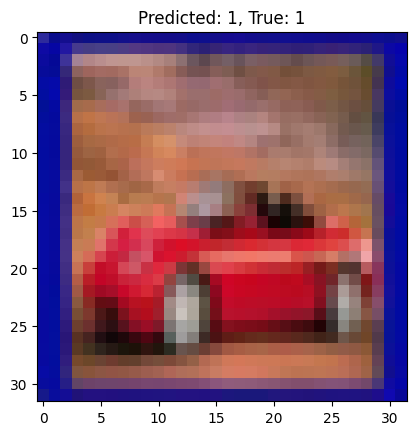

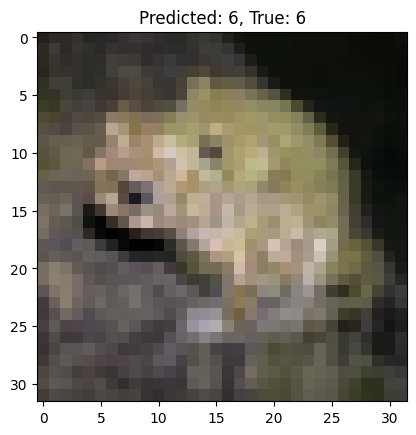

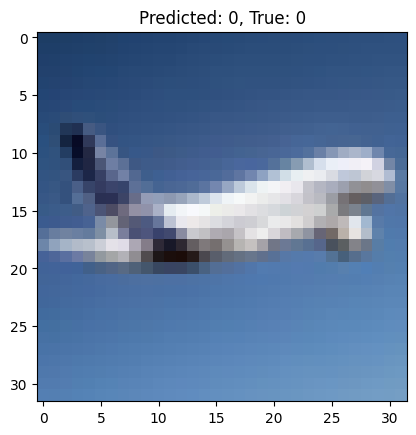

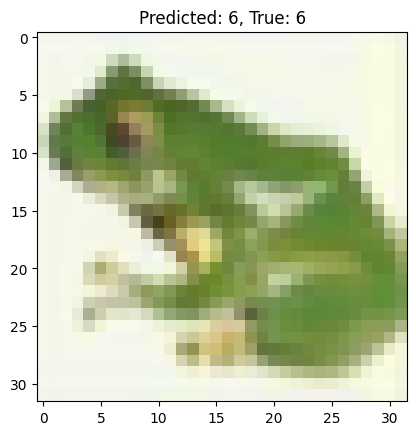

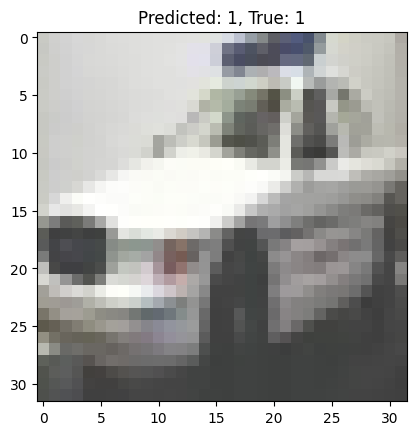

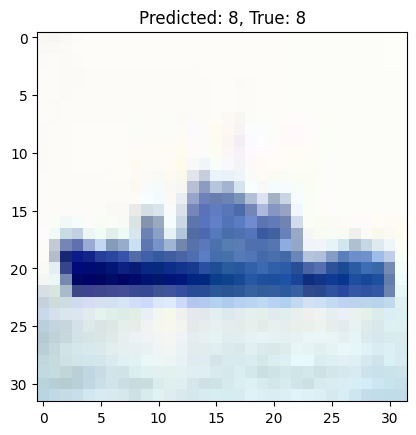

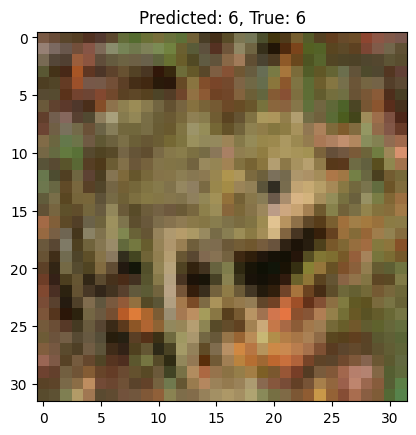

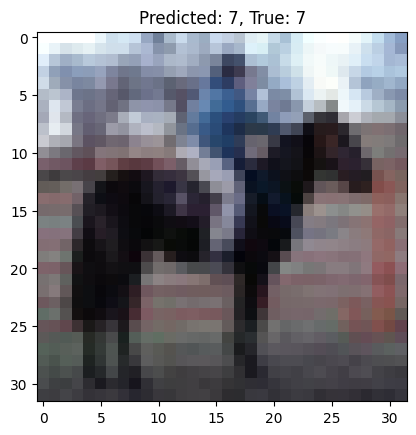

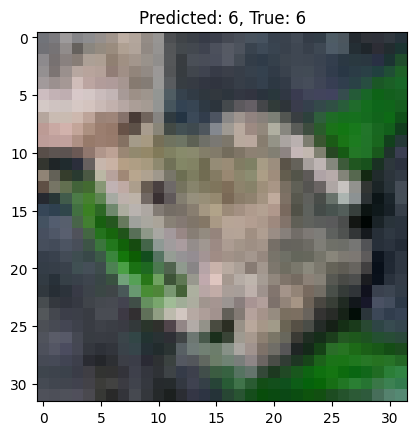

1/1 [==============================] - 0s 26ms/step


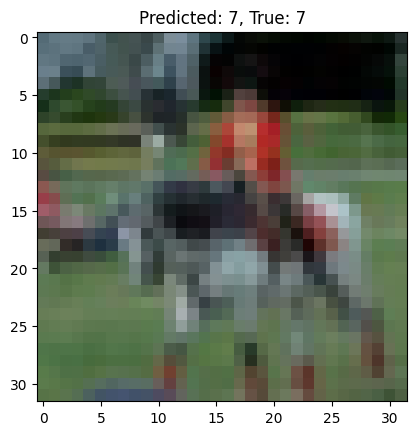

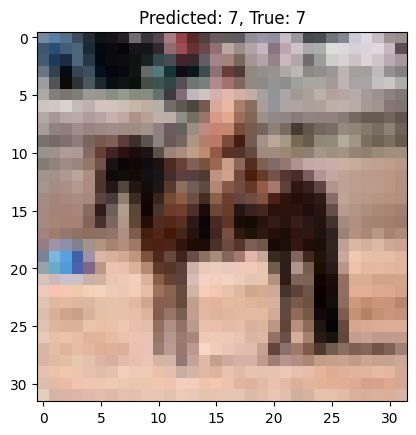

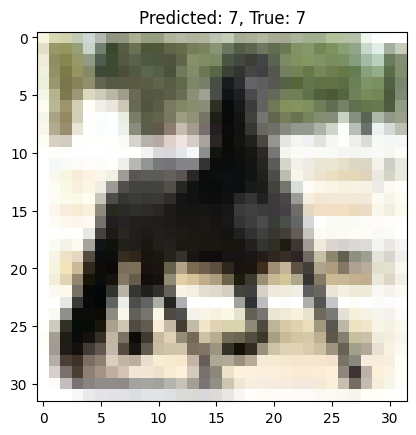

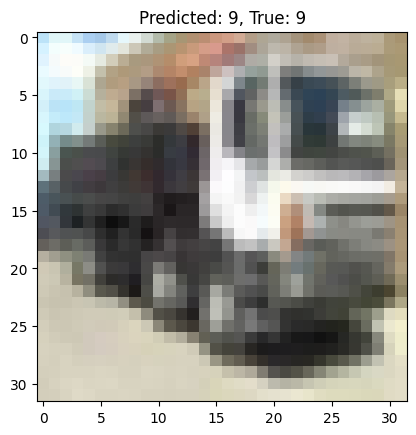

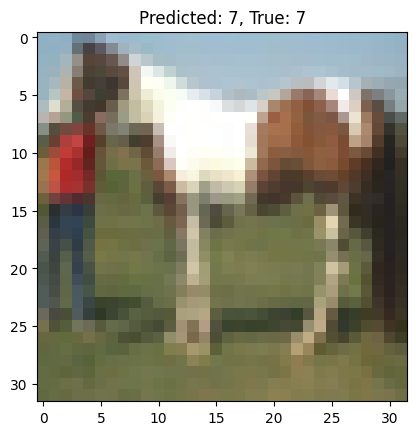

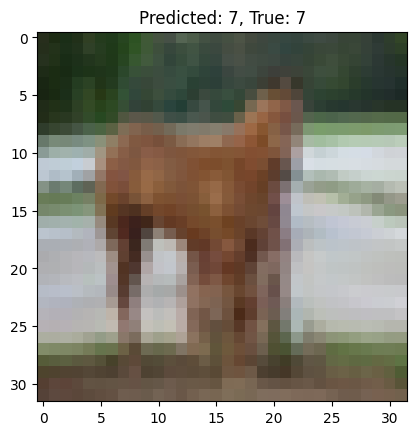

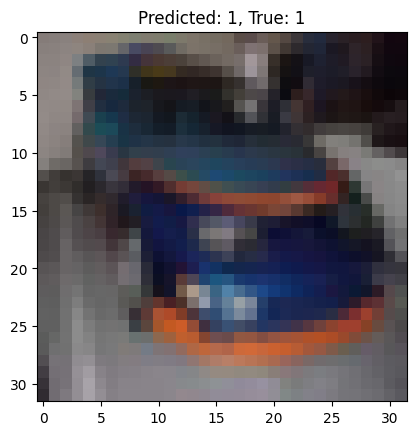

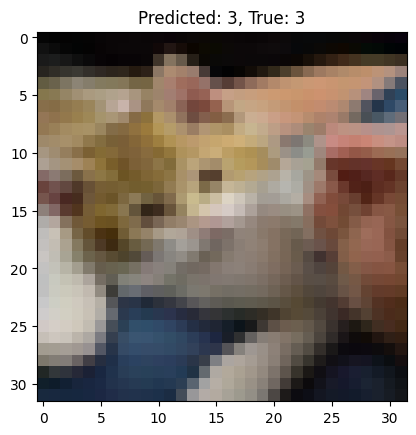

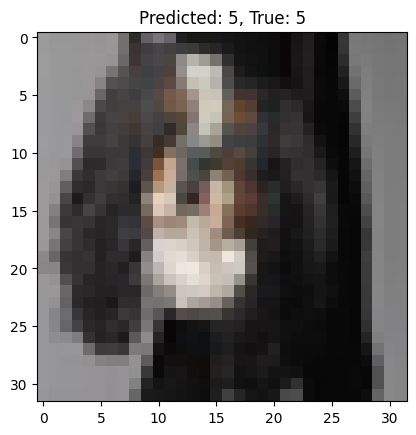

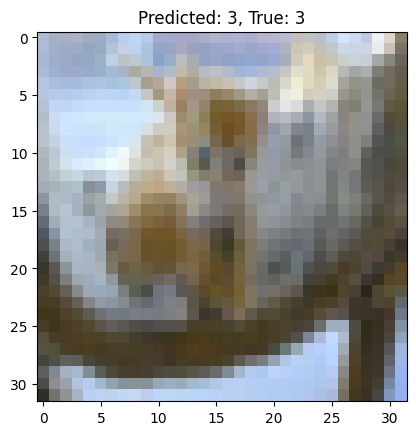

1/1 [==============================] - 0s 46ms/step


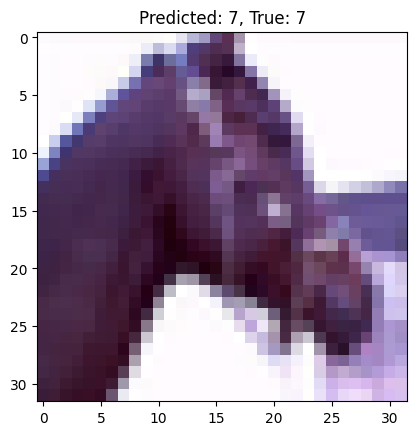

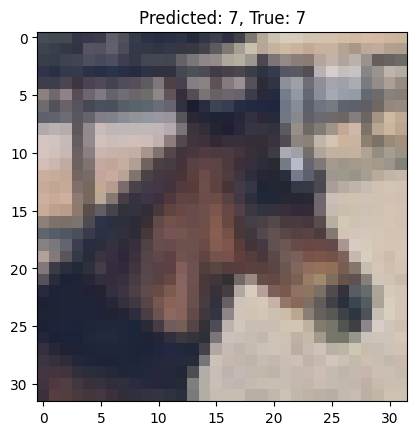

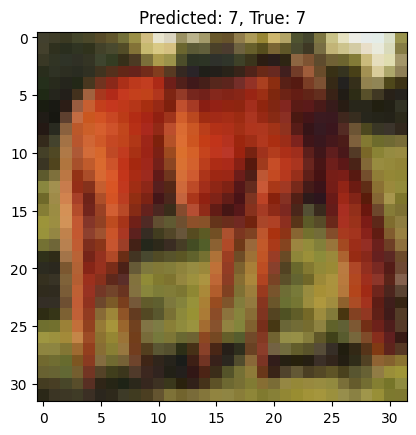

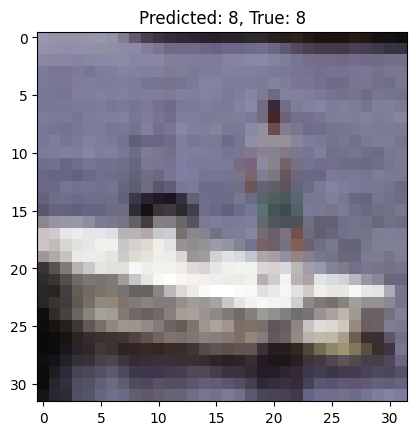

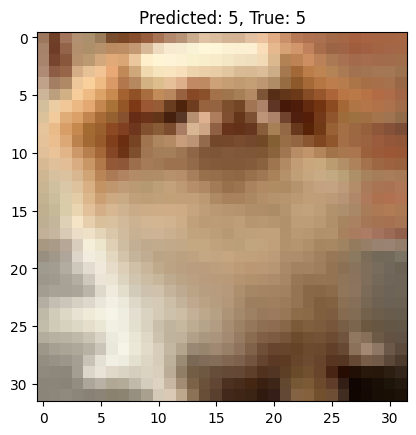

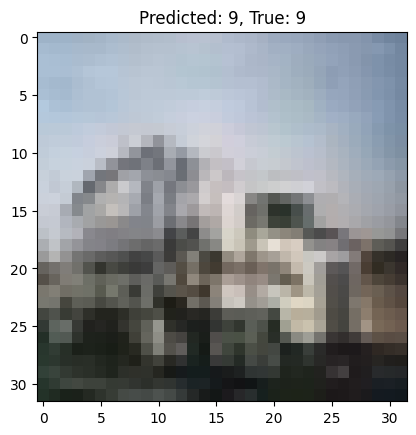

1/1 [==============================] - 0s 23ms/step


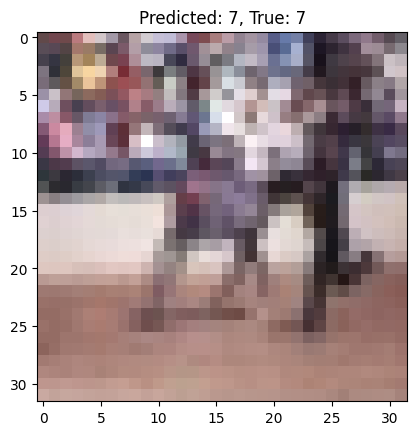

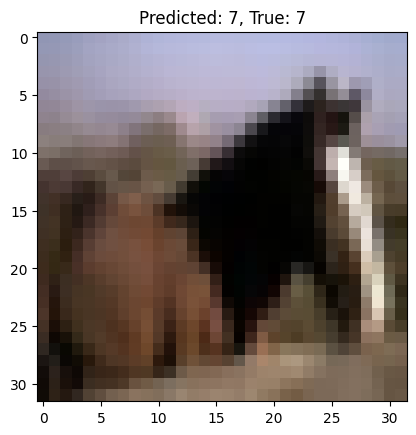

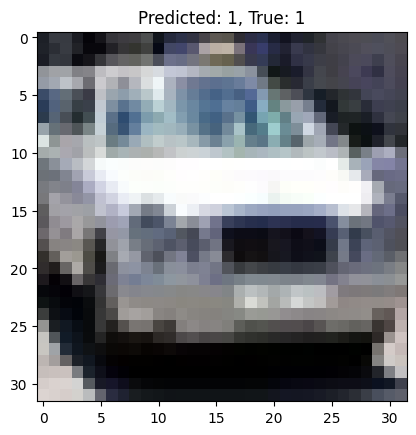

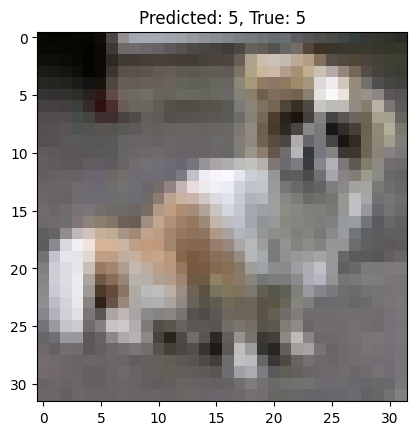

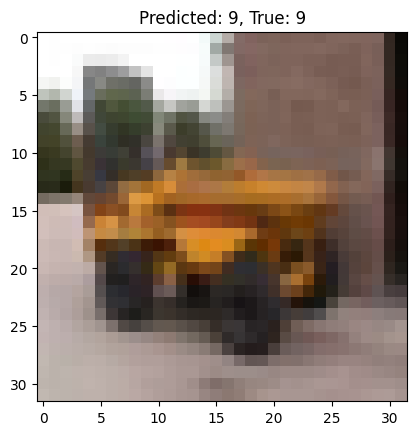

1/1 [==============================] - 0s 28ms/step


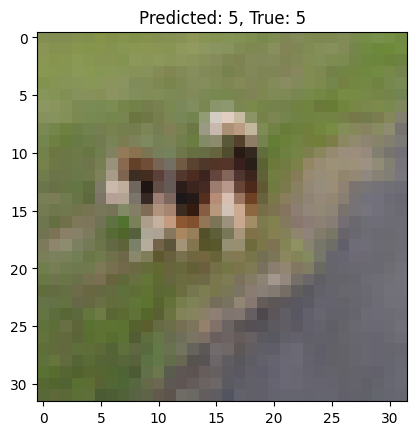

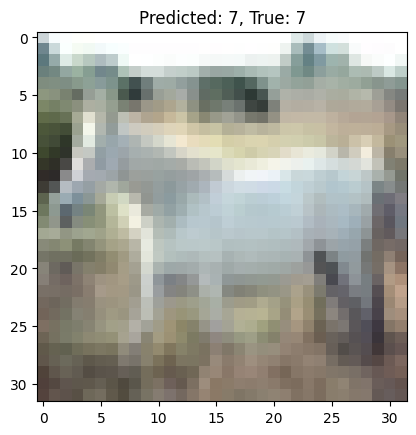

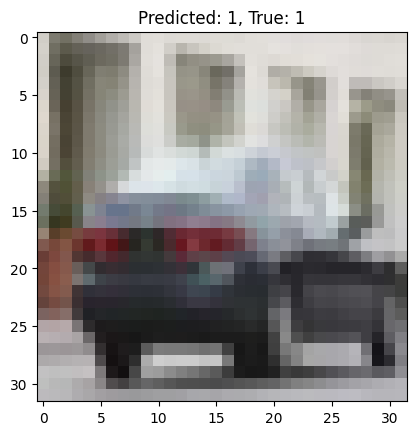

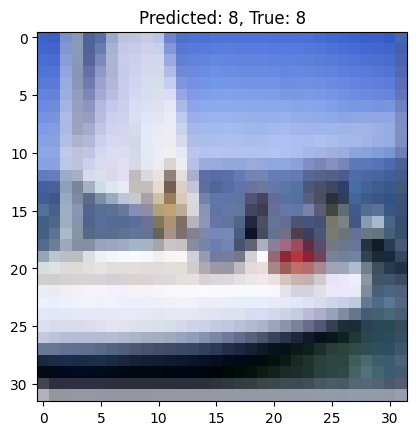

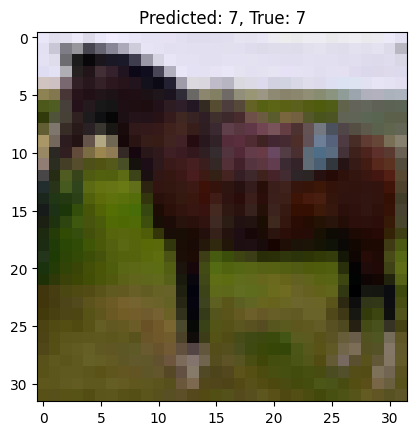

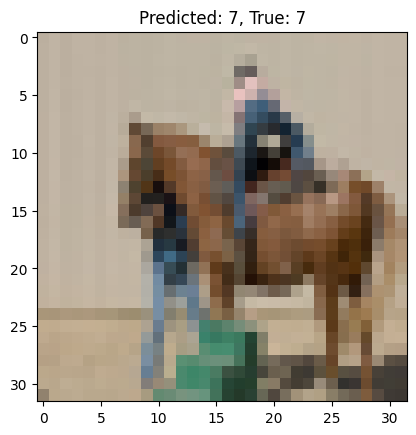

1/1 [==============================] - 0s 25ms/step


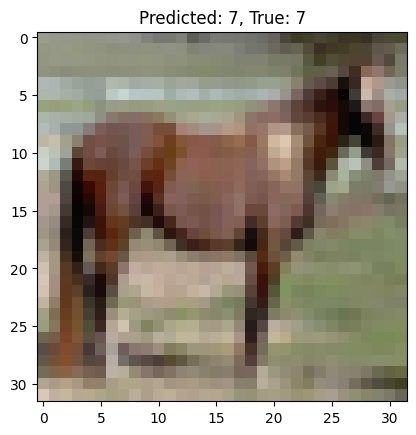

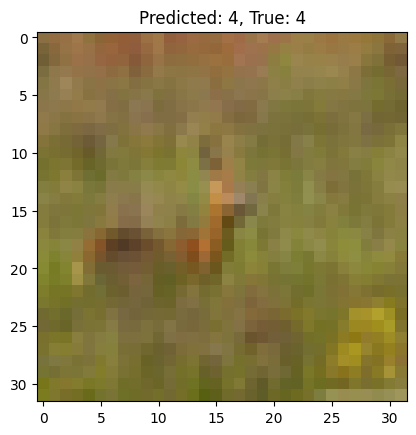

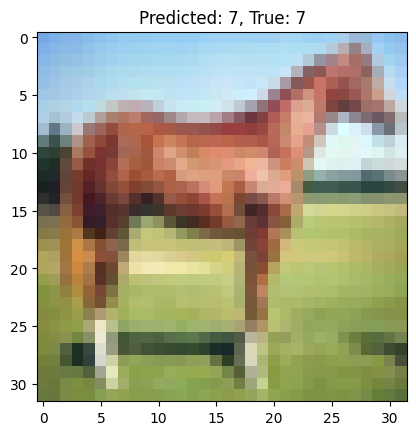

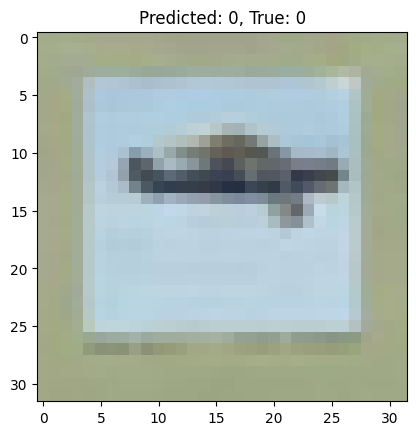

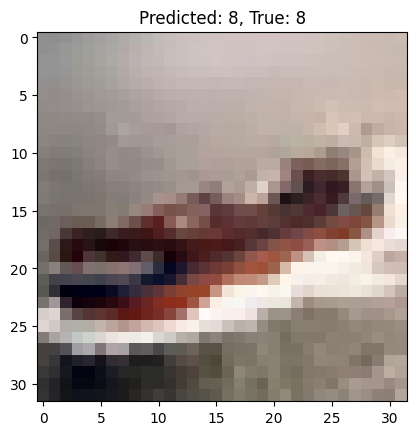

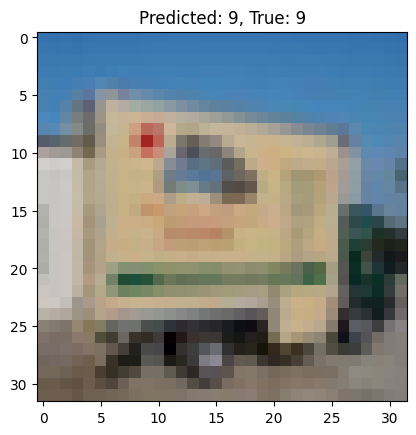

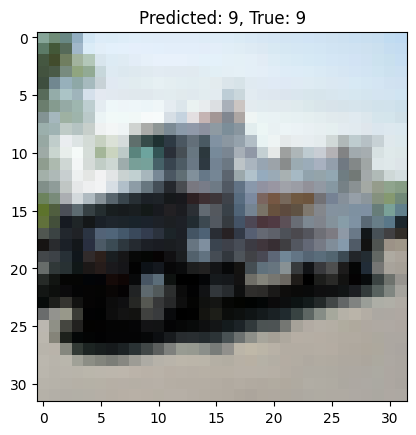

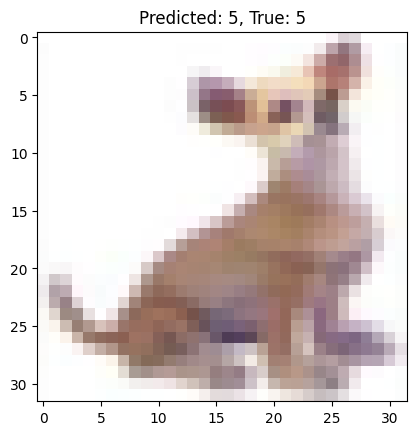

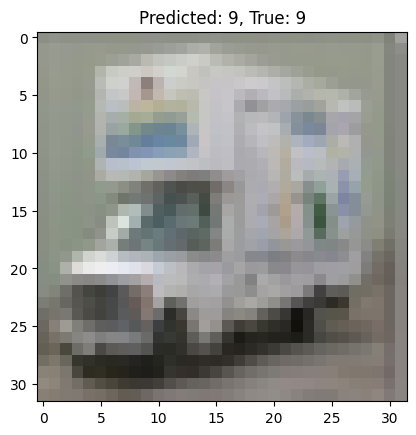

1/1 [==============================] - 0s 27ms/step


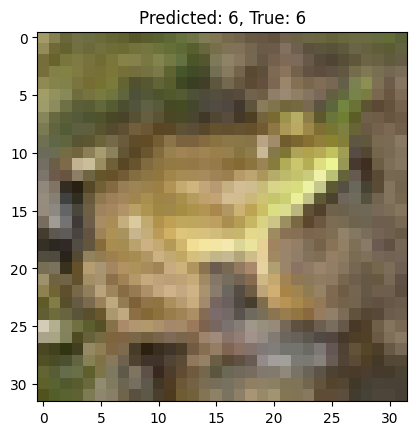

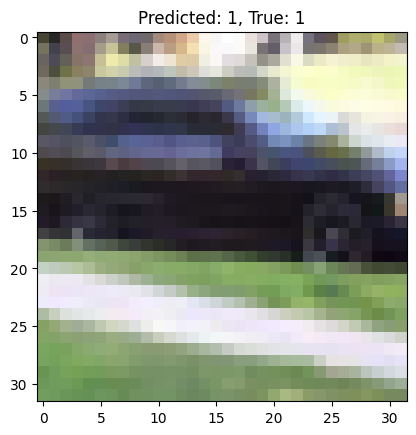

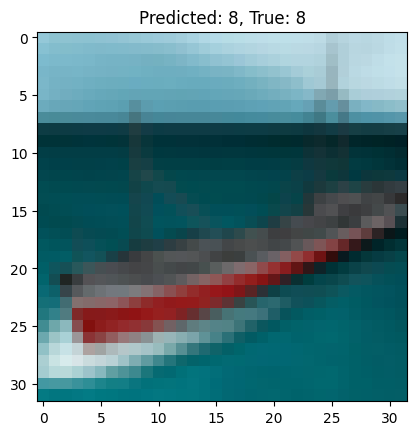

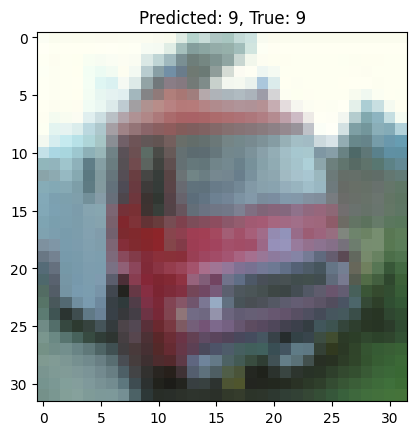

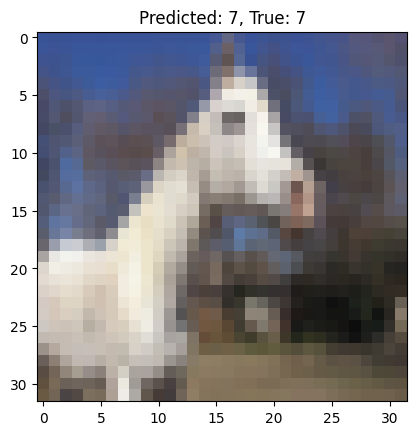

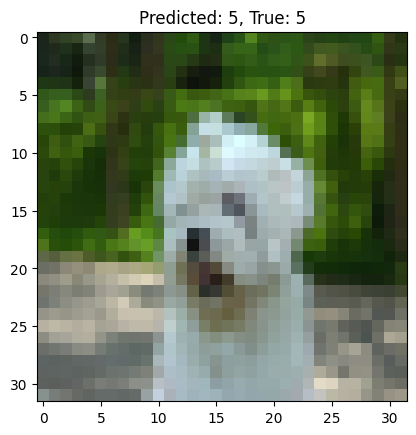

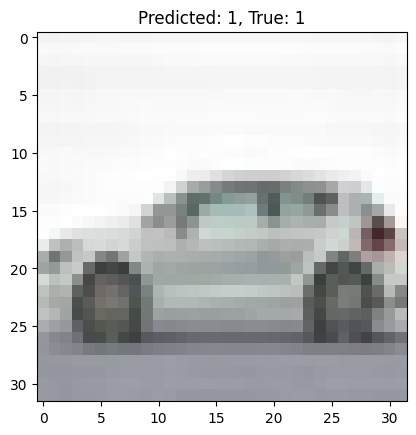

1/1 [==============================] - 0s 25ms/step


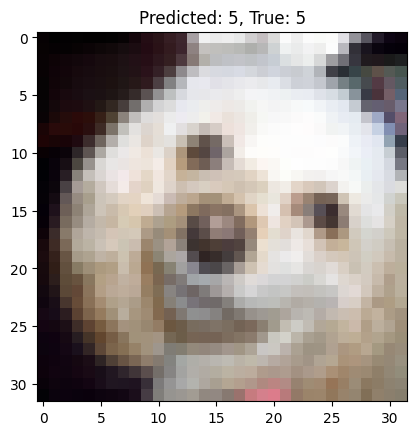

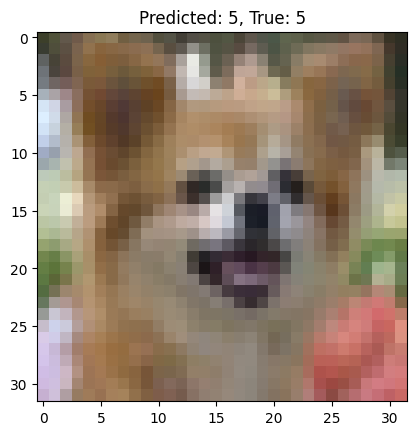

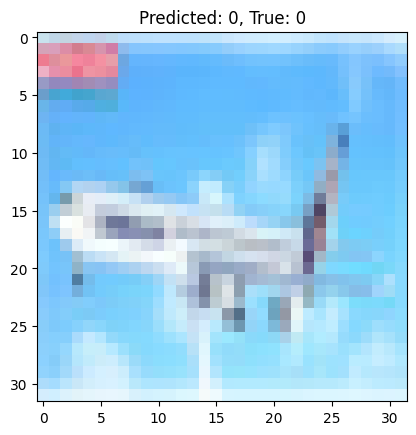

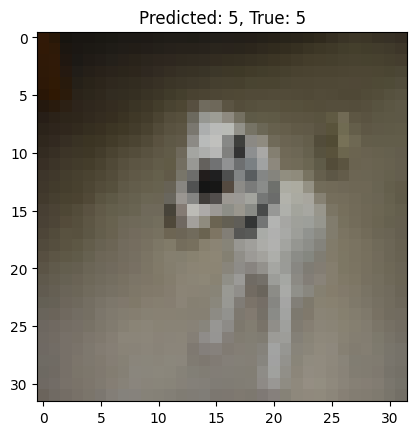

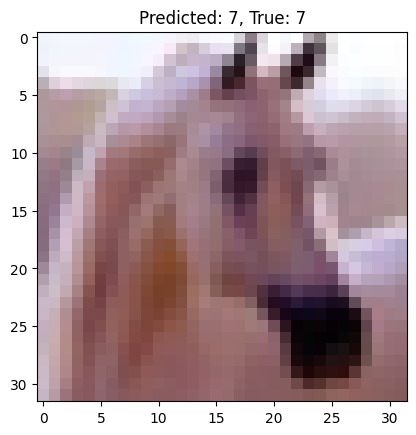

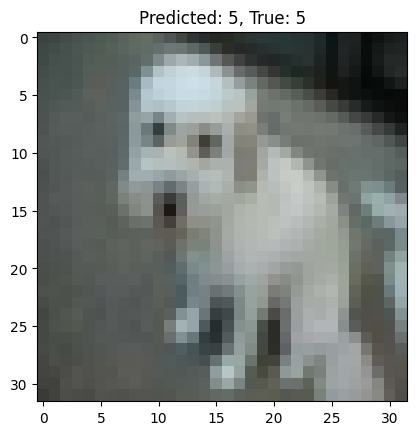

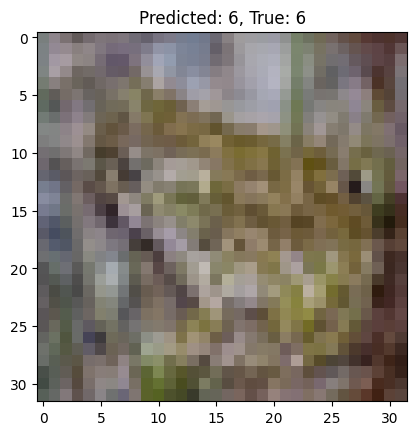

1/1 [==============================] - 0s 36ms/step


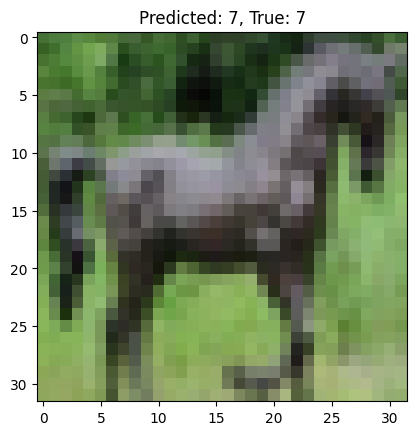

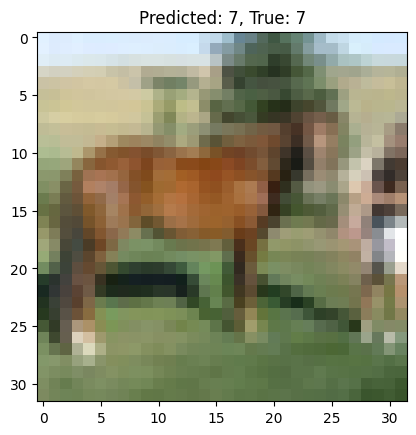

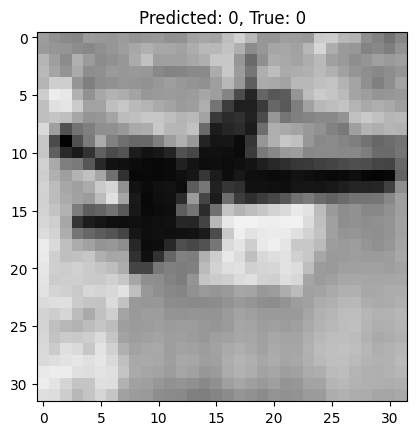

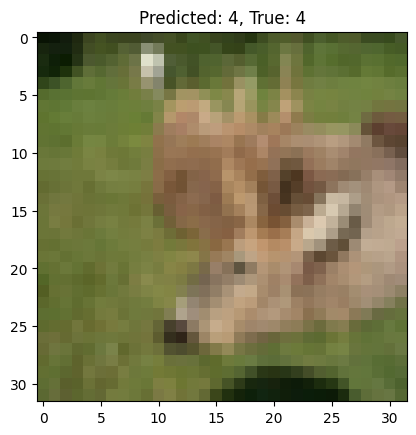

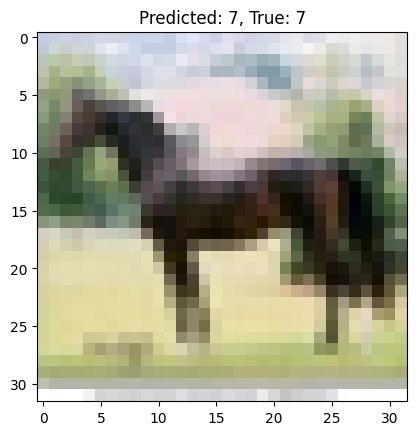

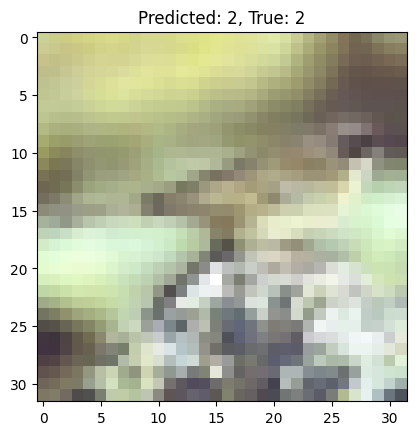

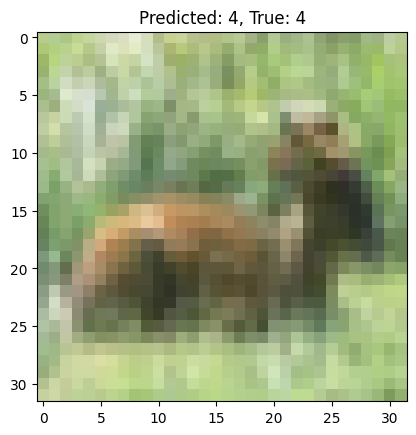

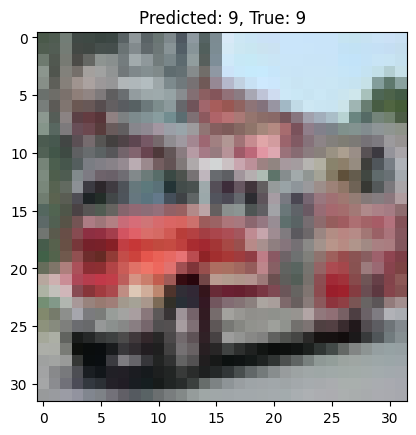

1/1 [==============================] - 0s 22ms/step


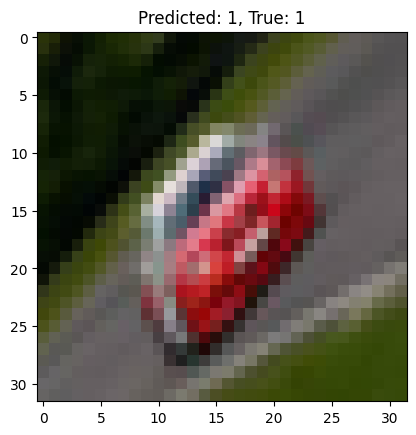

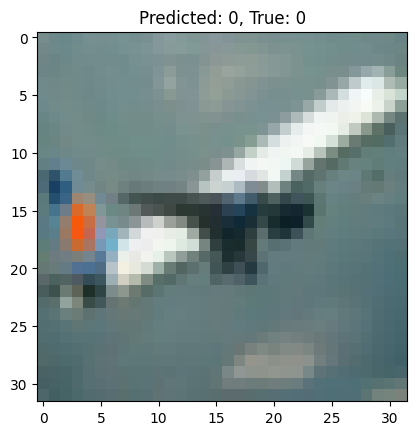

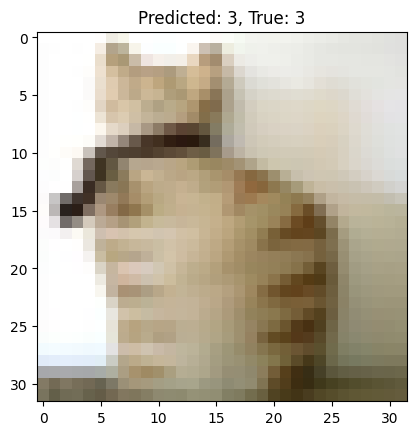

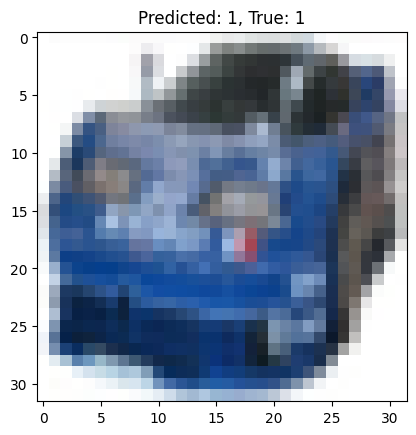

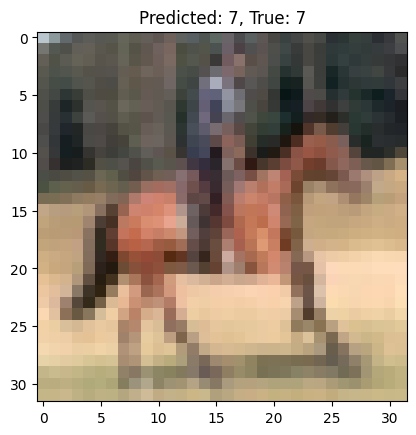

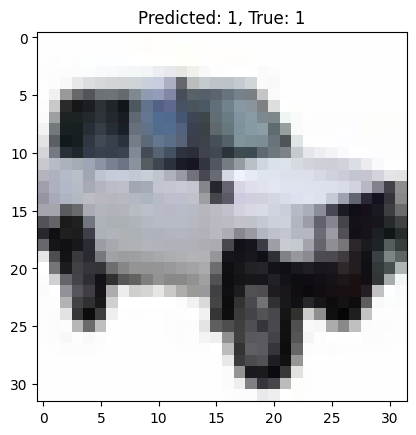

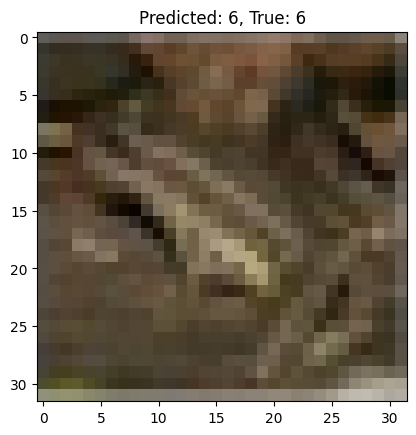

Epoch 2/5
1/1 [==============================] - 0s 25ms/step


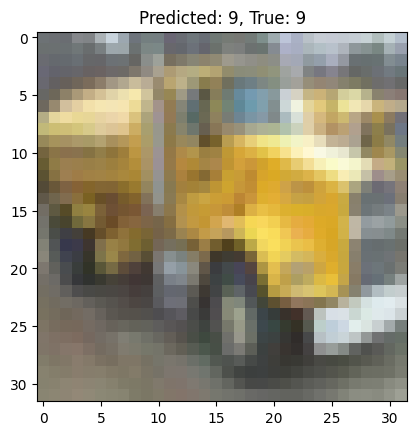

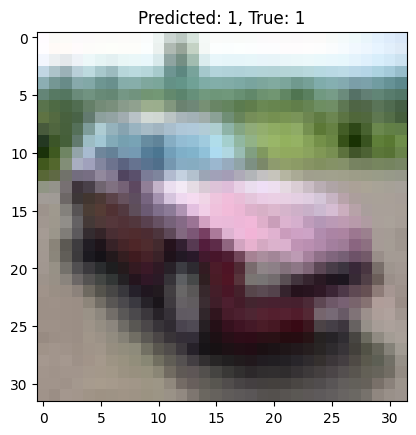

1/1 [==============================] - 0s 26ms/step


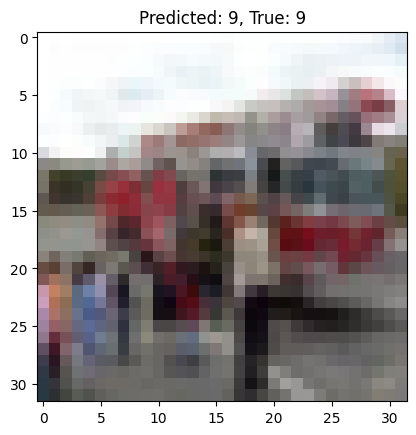

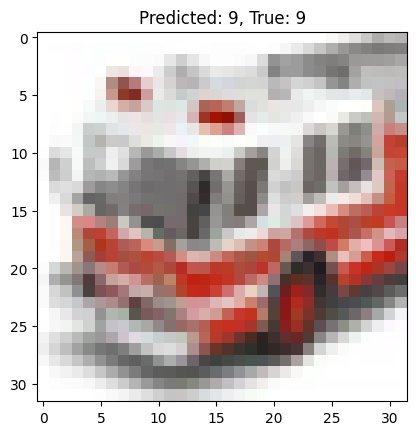

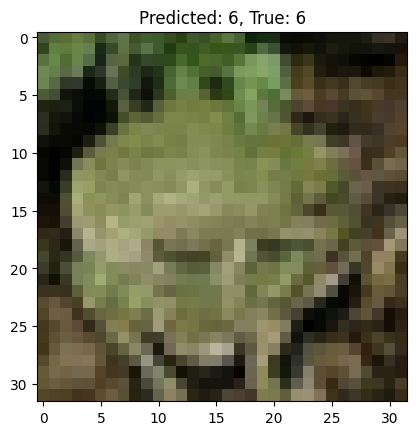

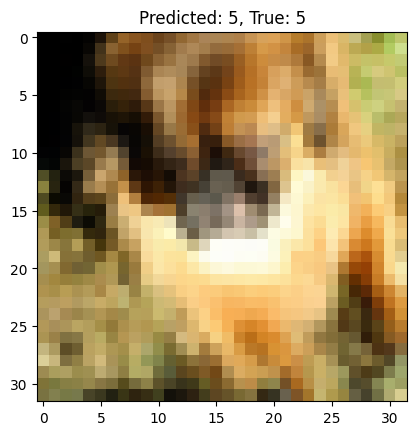

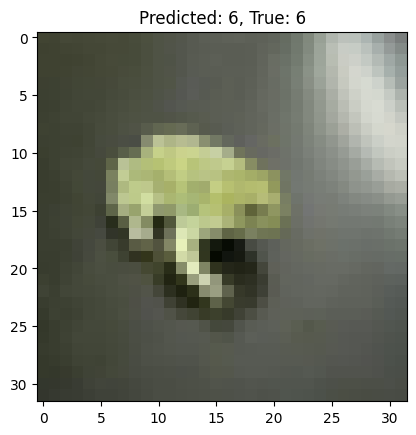

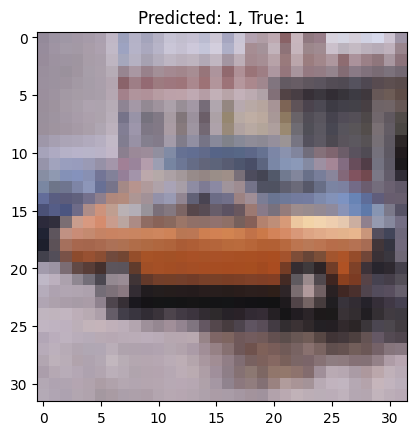

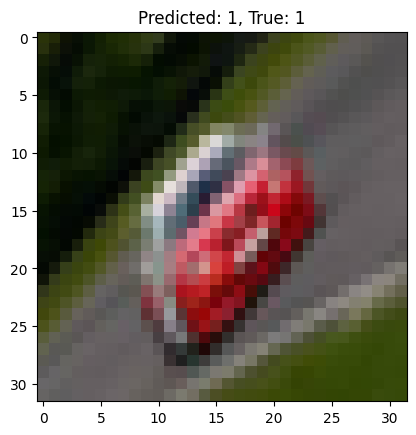

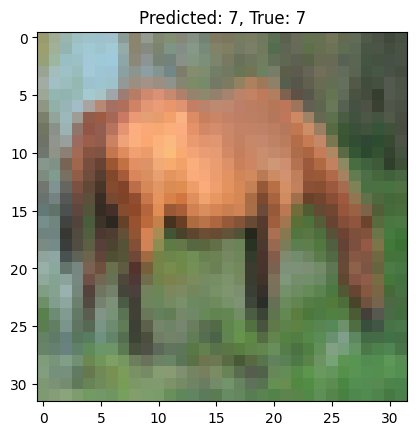

1/1 [==============================] - 0s 25ms/step


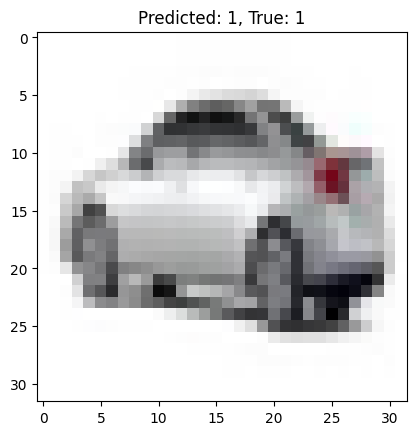

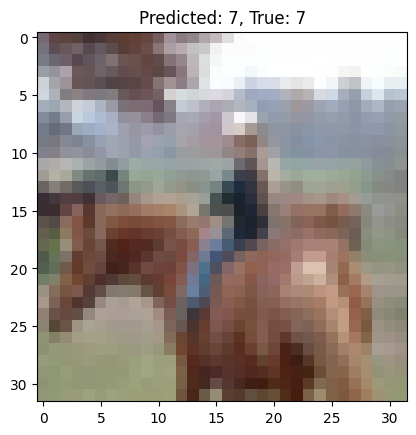

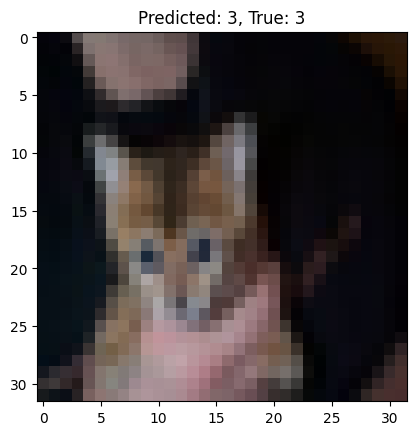

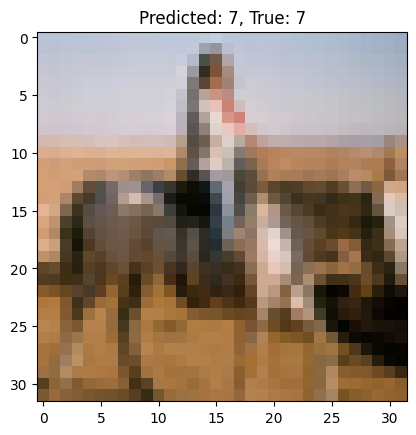

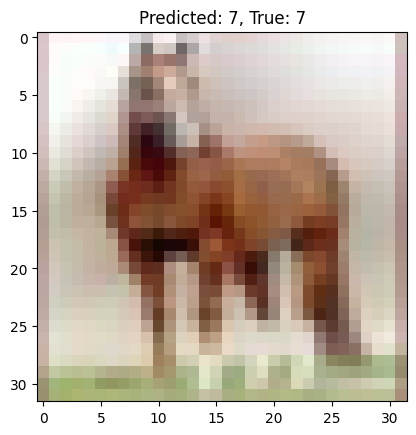

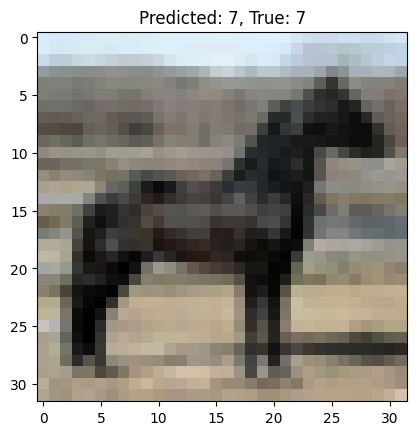

1/1 [==============================] - 0s 26ms/step


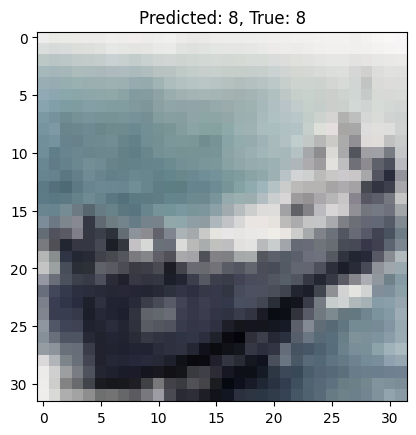

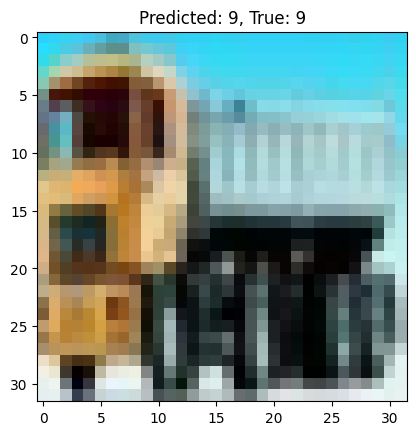

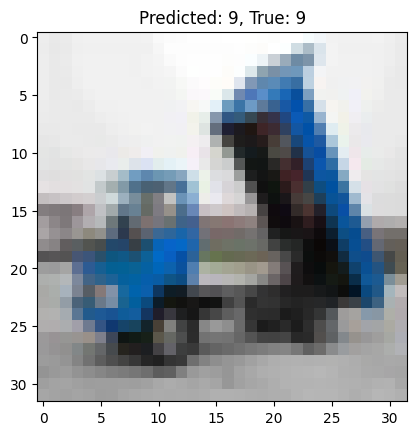

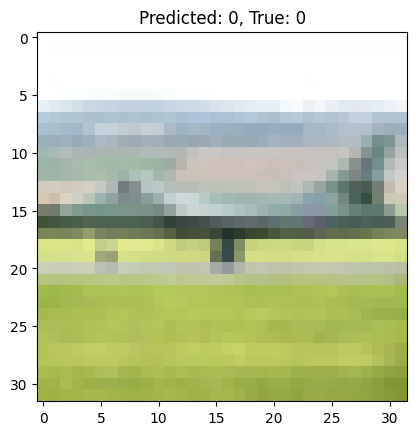

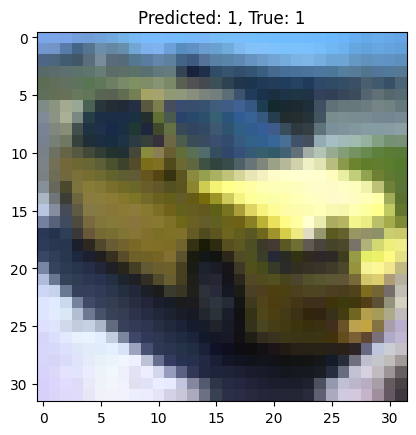

1/1 [==============================] - 0s 23ms/step


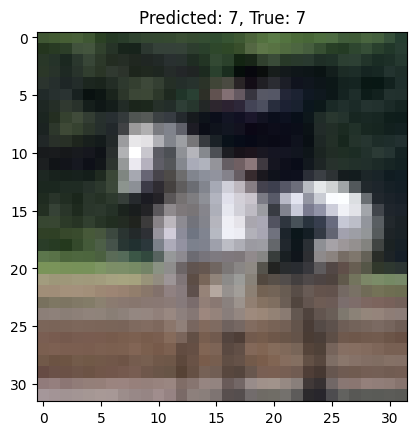

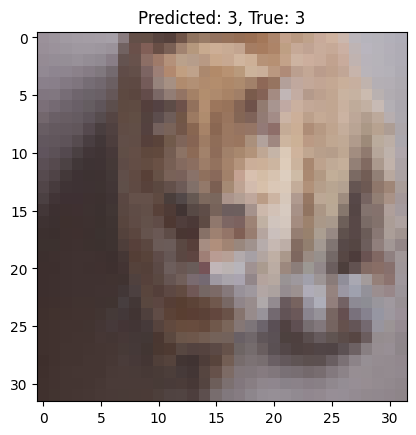

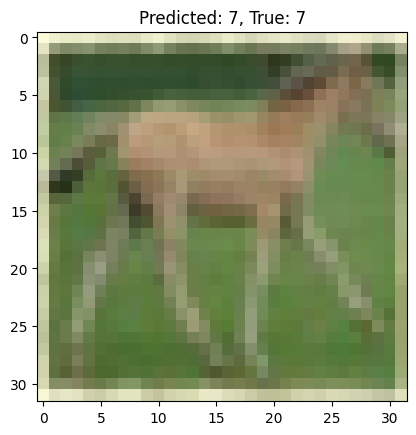

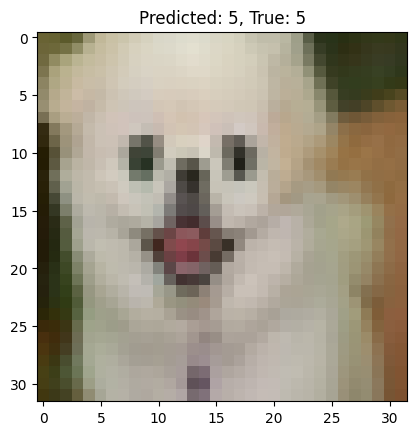

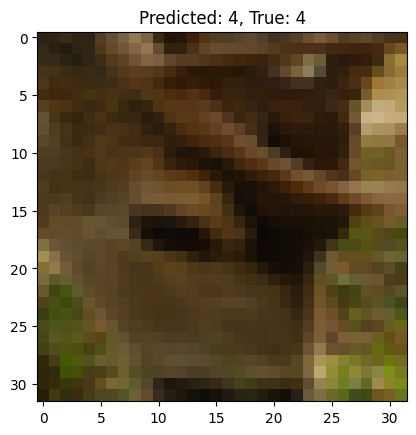

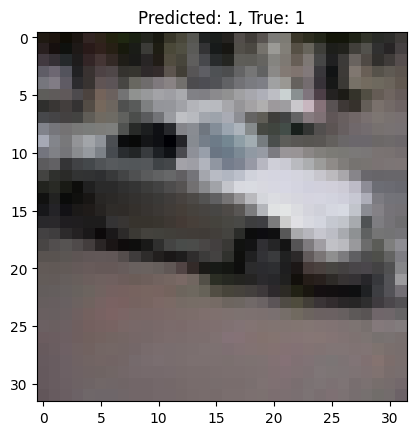

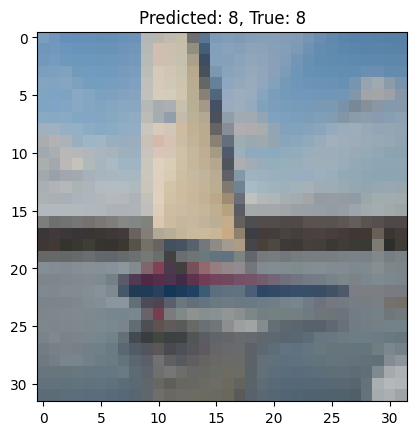

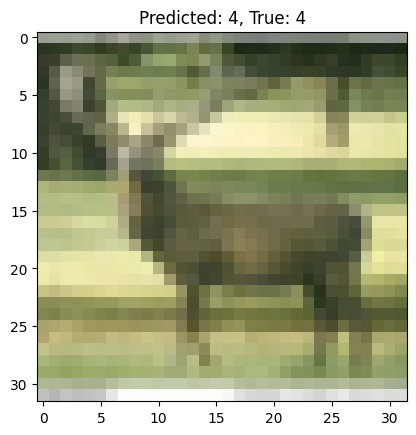

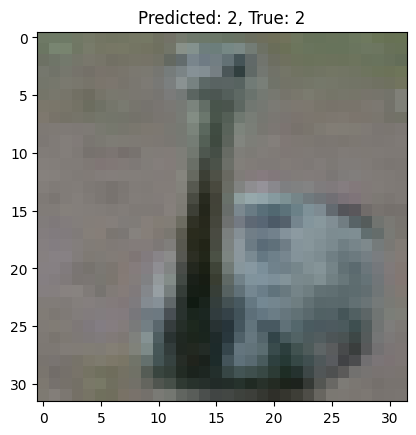

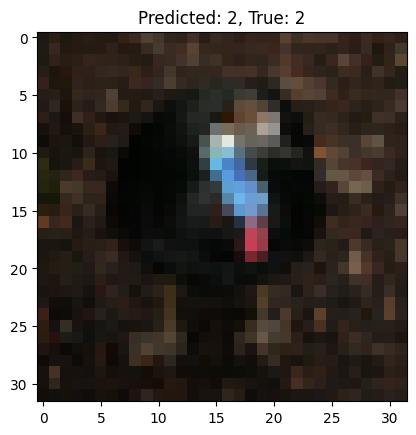

1/1 [==============================] - 0s 26ms/step


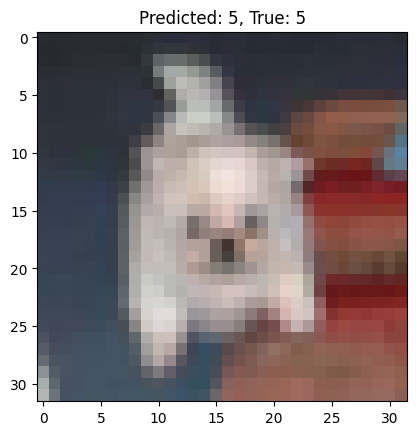

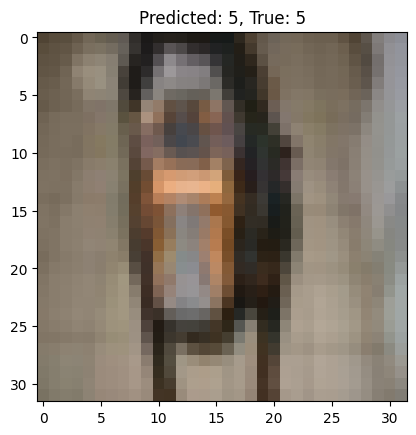

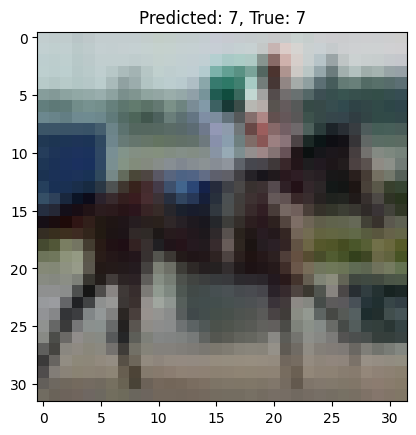

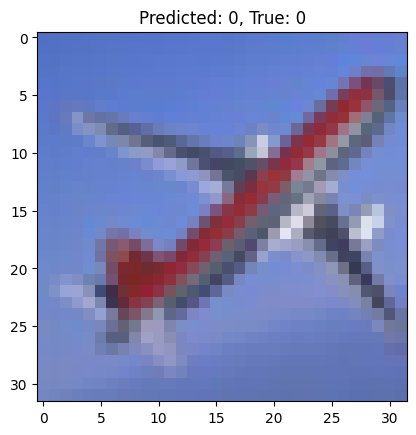

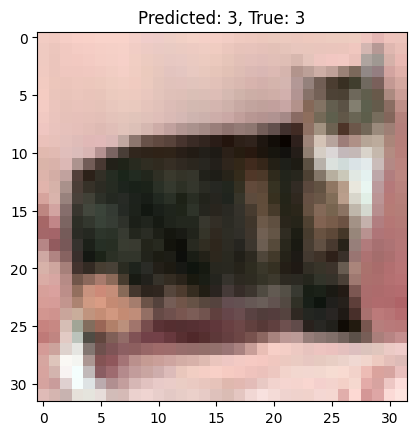

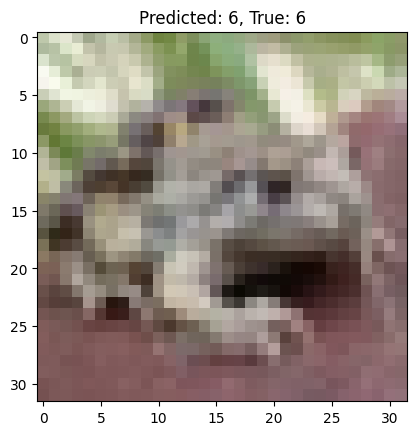

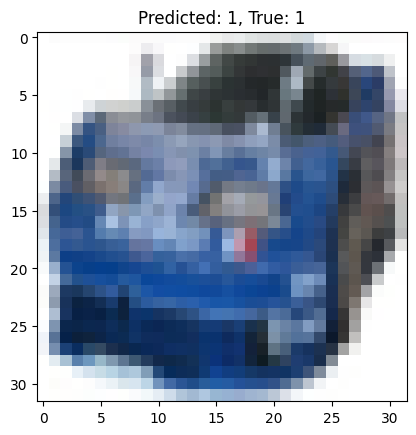

1/1 [==============================] - 0s 40ms/step


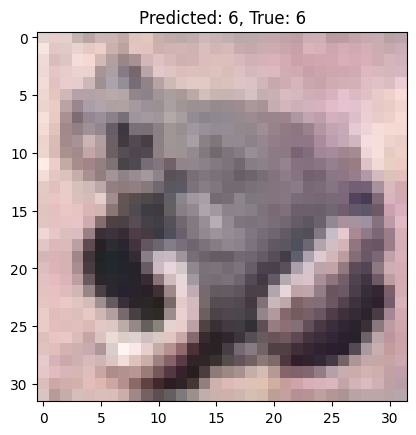

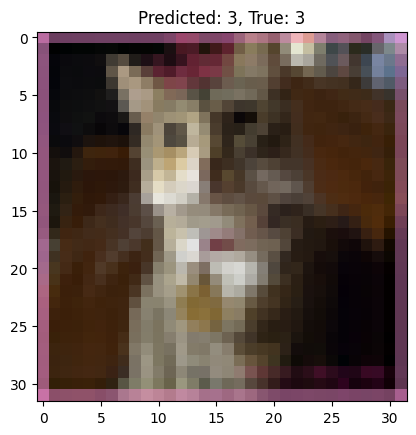

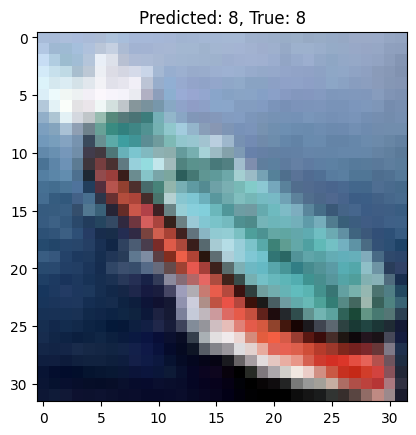

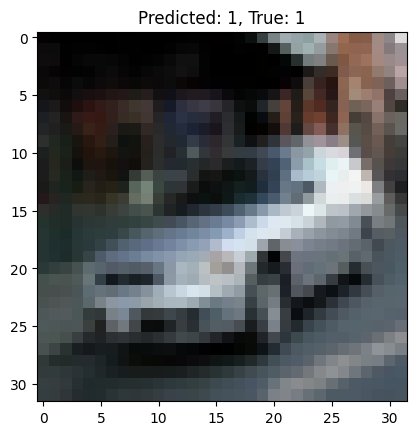

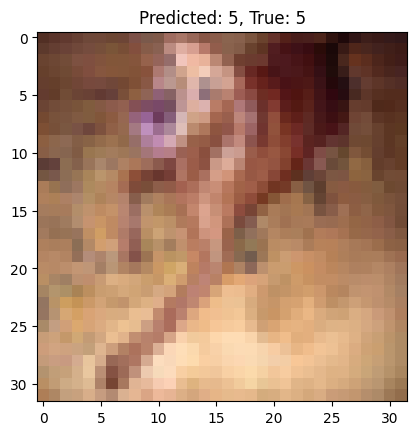

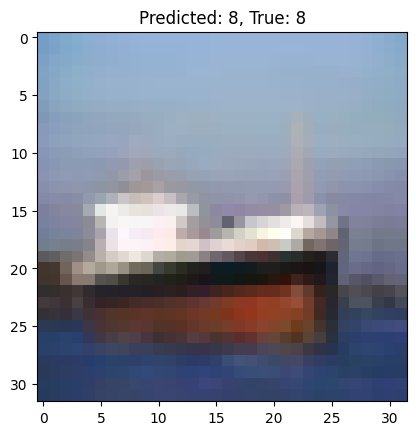

1/1 [==============================] - 0s 26ms/step


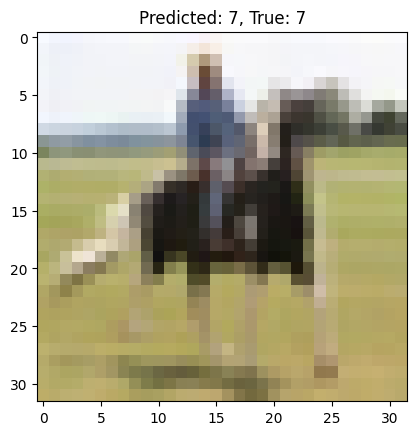

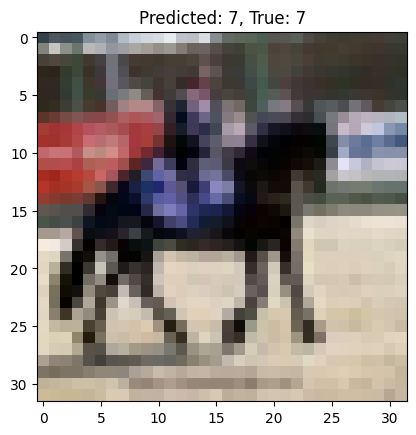

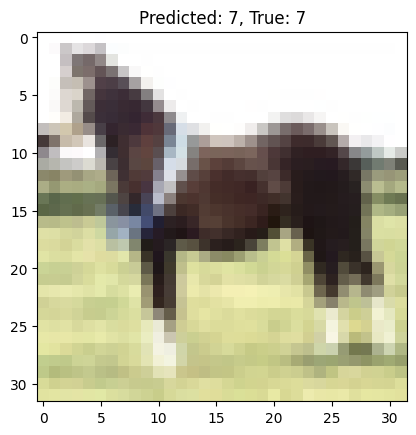

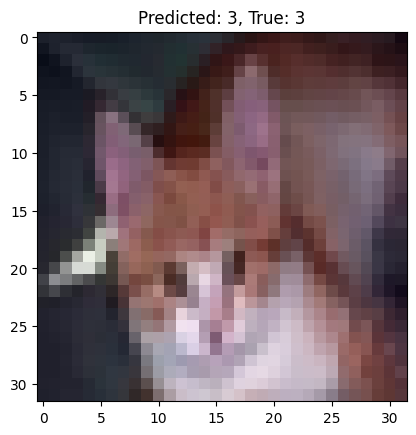

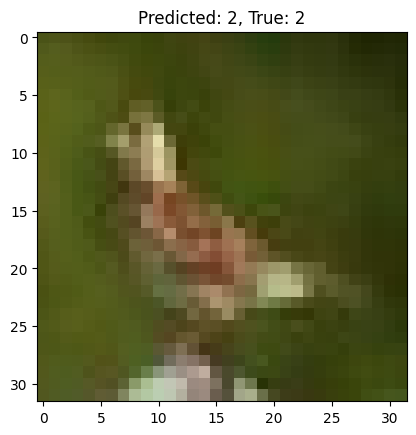

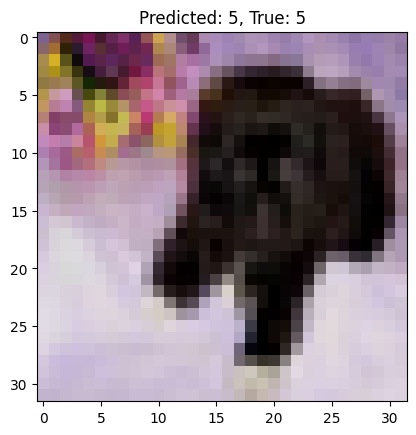

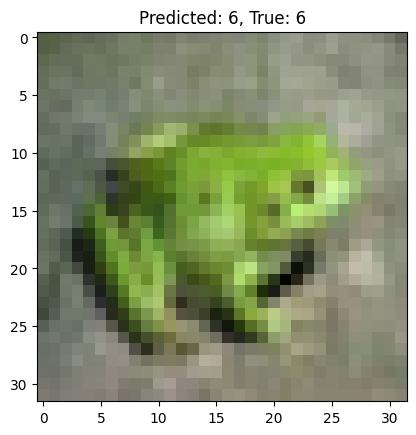

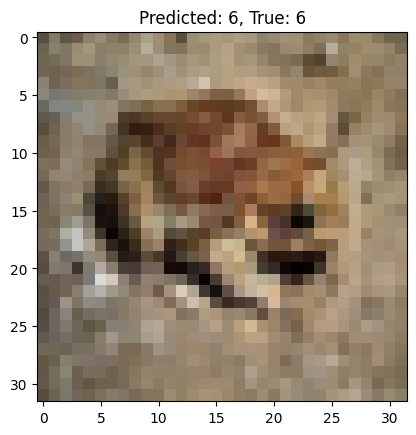

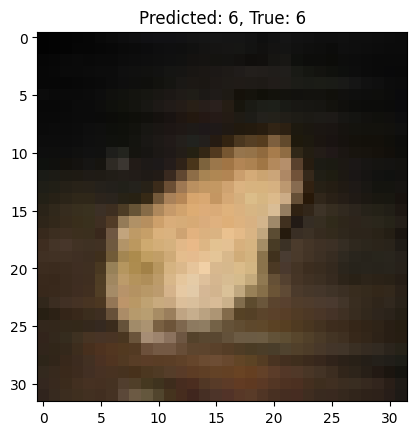

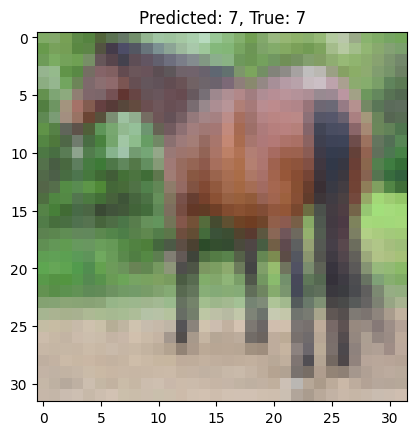

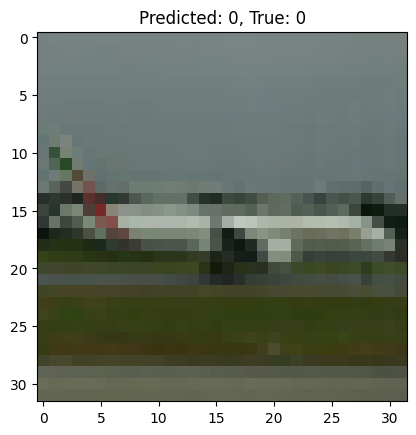

1/1 [==============================] - 0s 26ms/step


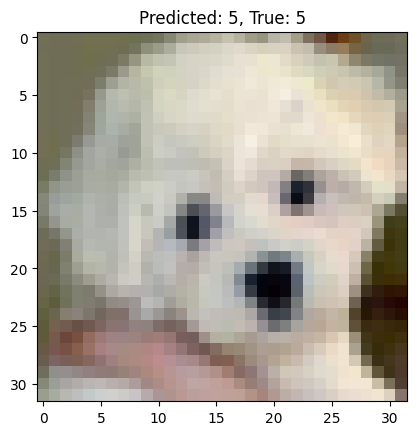

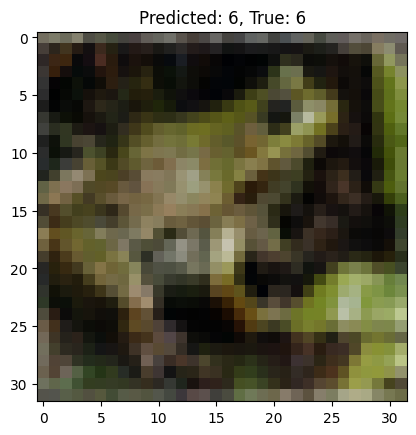

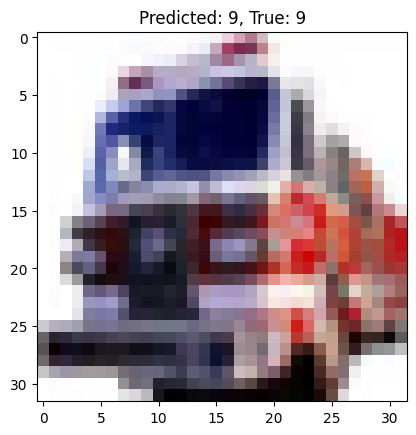

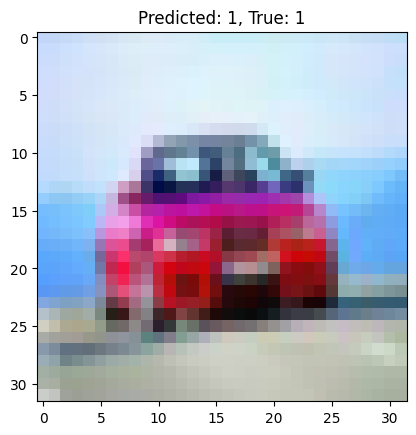

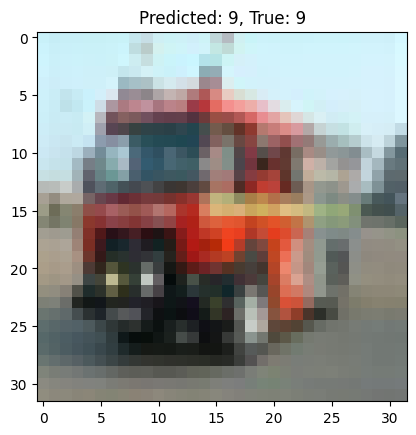

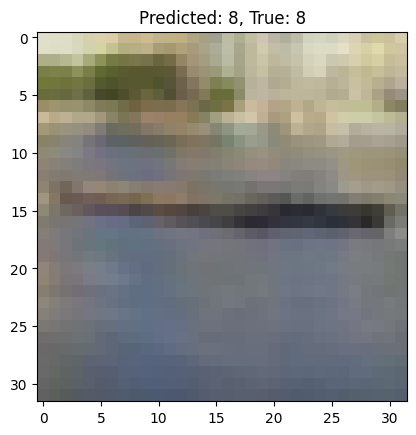

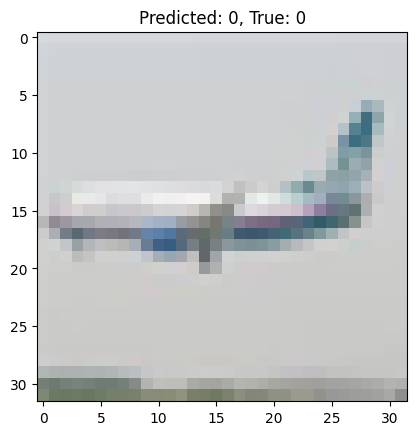

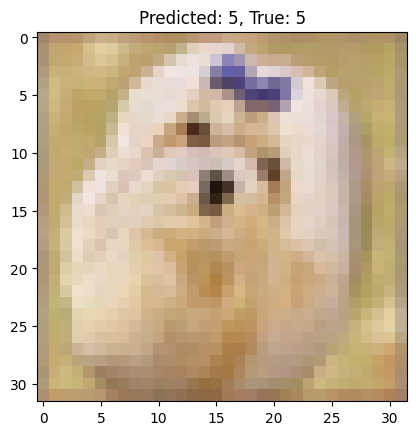

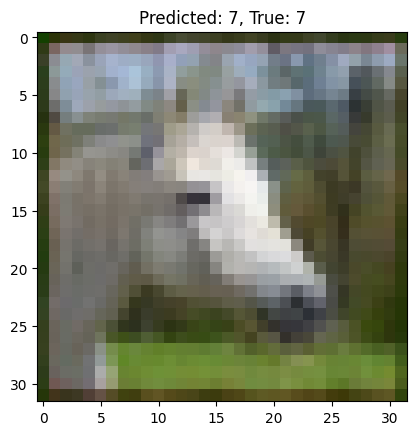

1/1 [==============================] - 0s 25ms/step


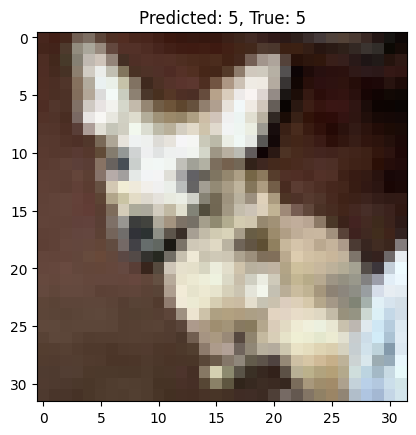

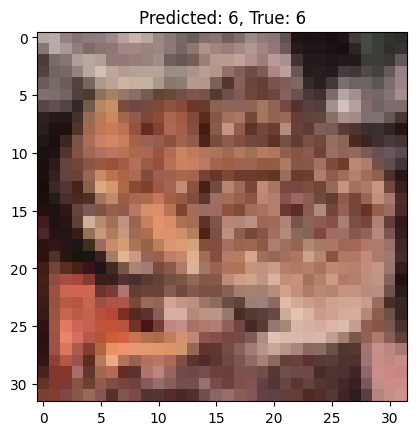

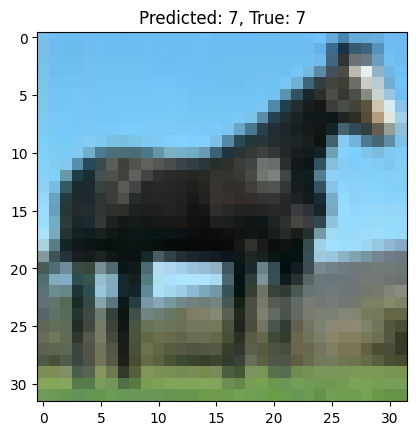

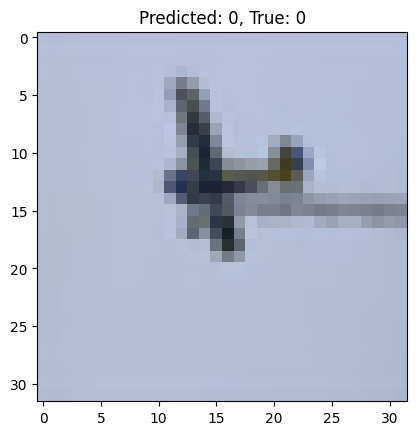

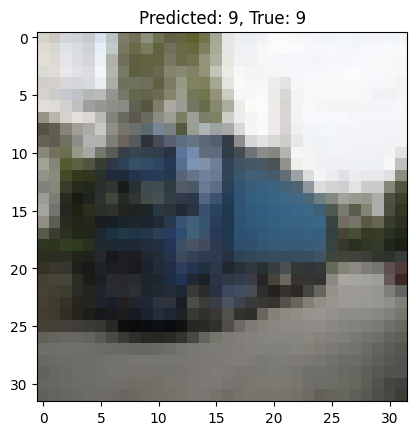

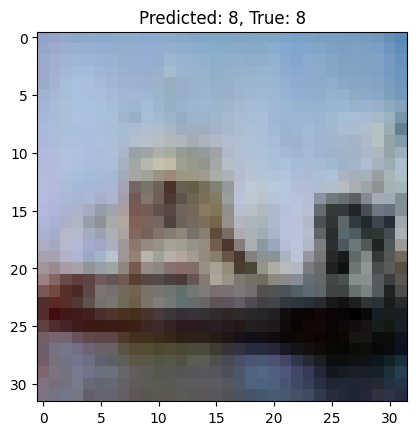

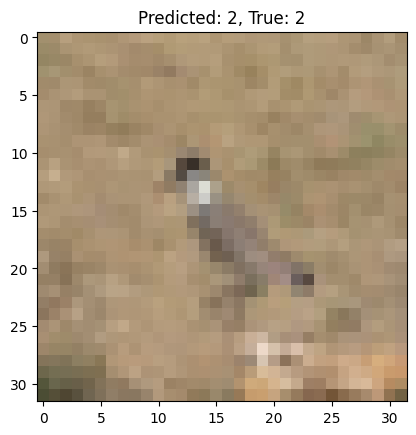

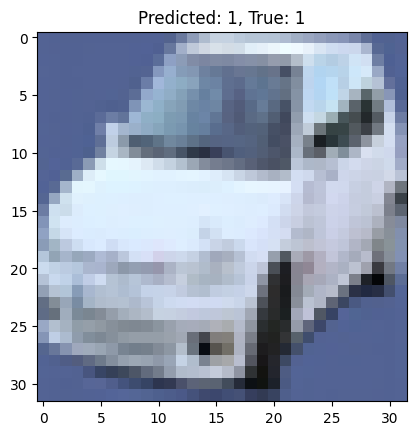

Epoch 3/5
1/1 [==============================] - 0s 28ms/step


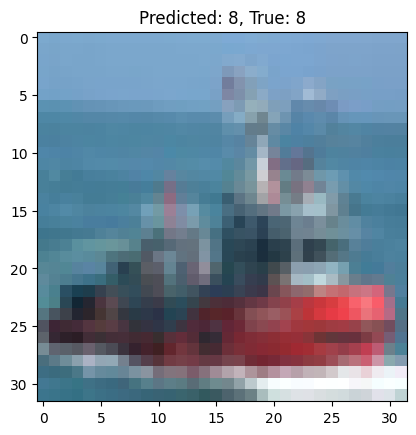

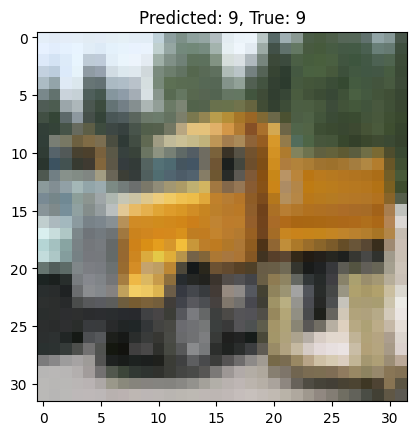

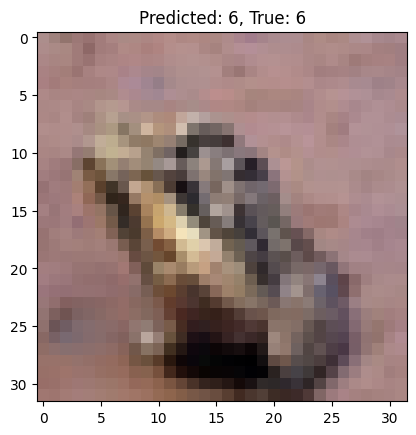

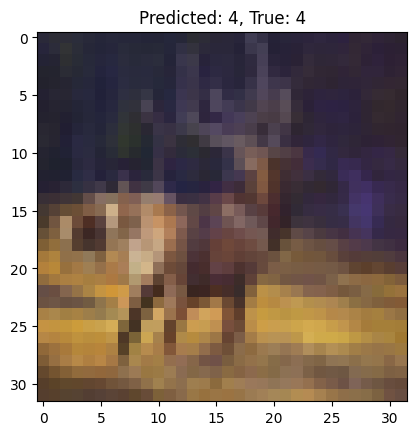

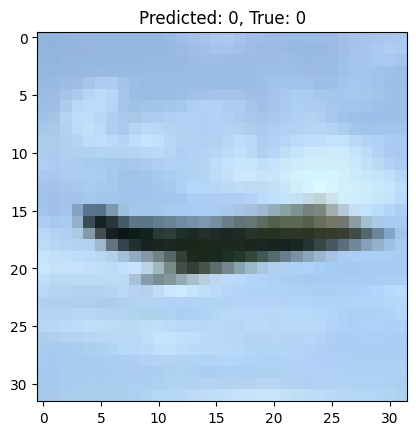

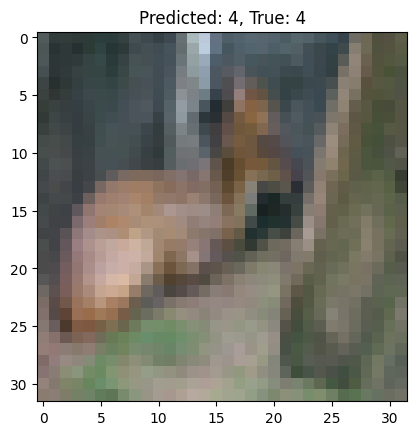

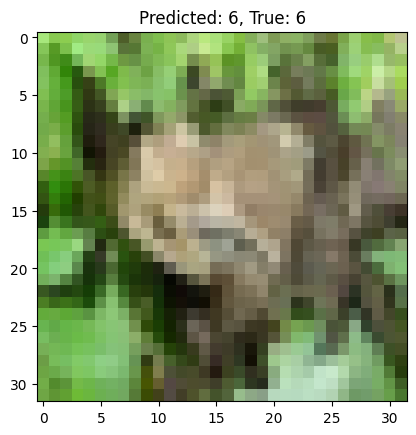

1/1 [==============================] - 0s 37ms/step


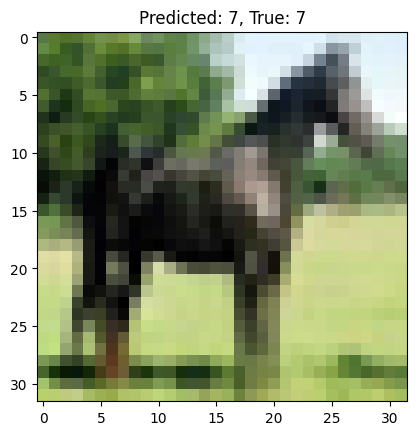

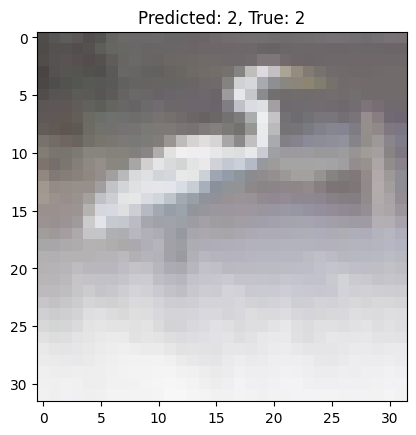

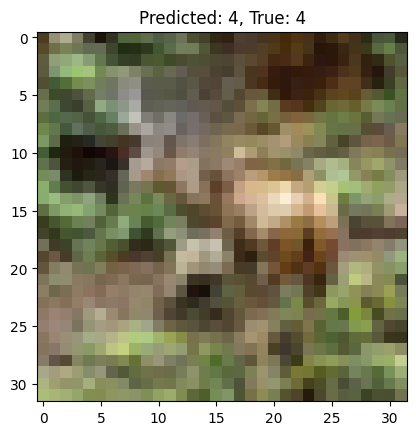

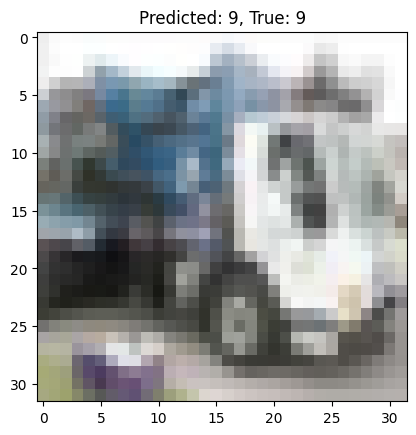

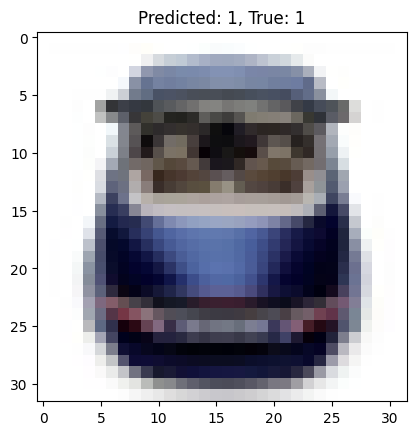

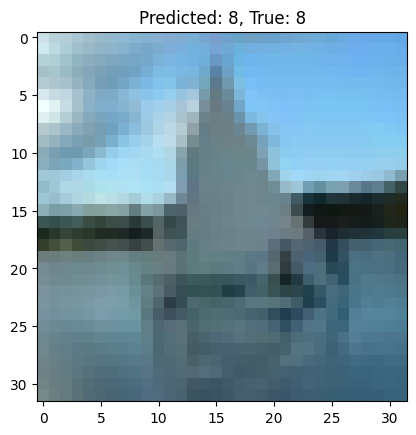

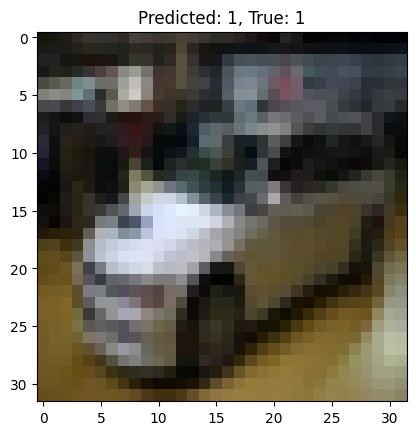

1/1 [==============================] - 0s 24ms/step


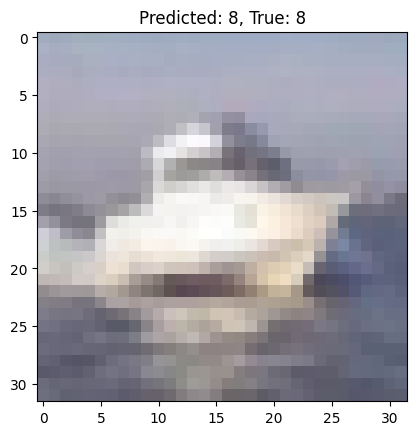

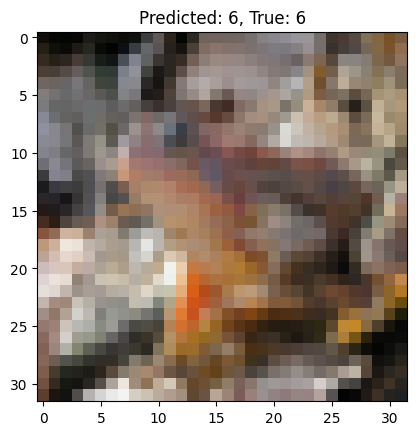

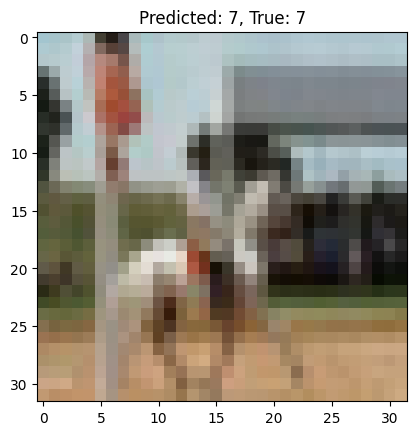

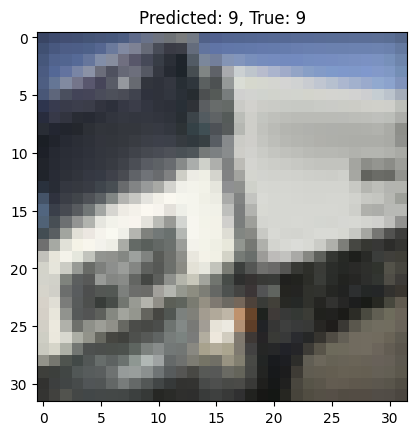

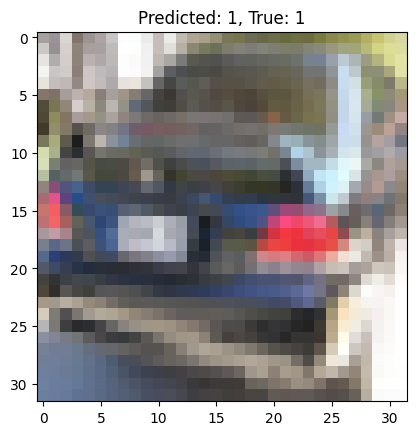

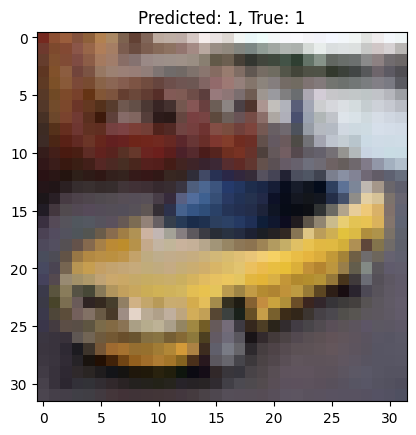

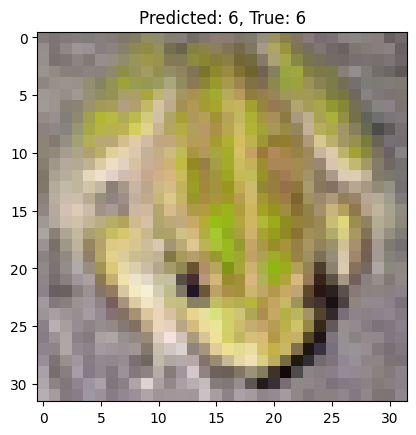

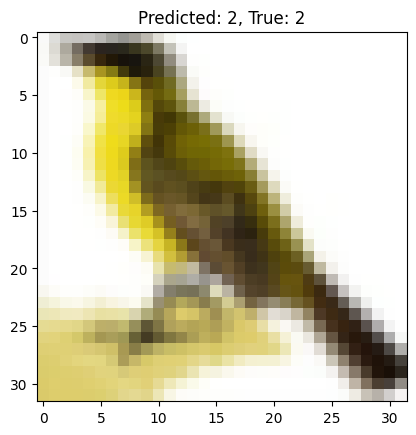

1/1 [==============================] - 0s 30ms/step


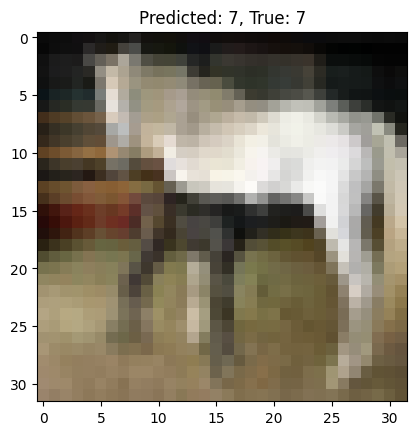

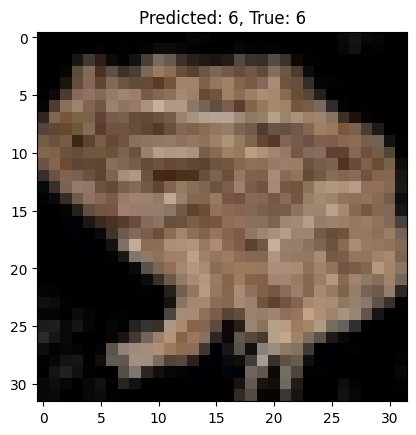

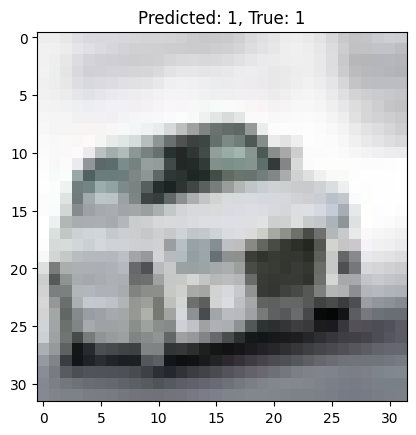

1/1 [==============================] - 0s 25ms/step


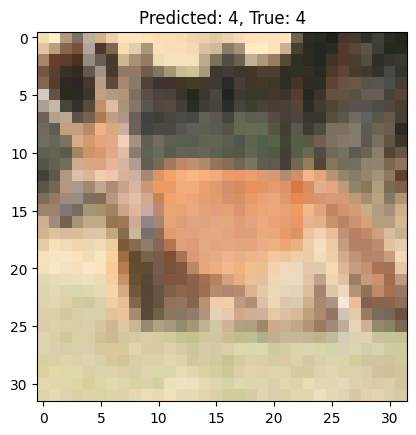

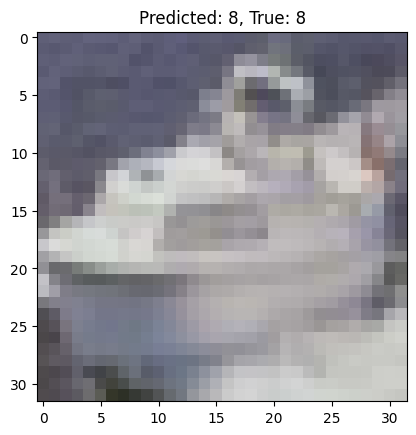

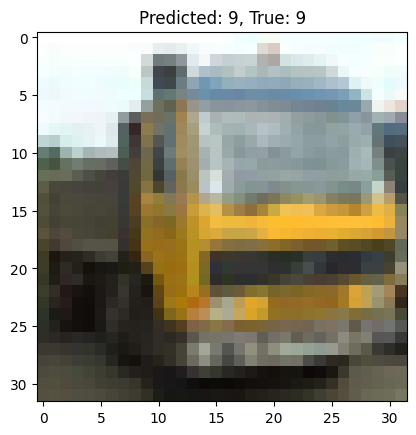

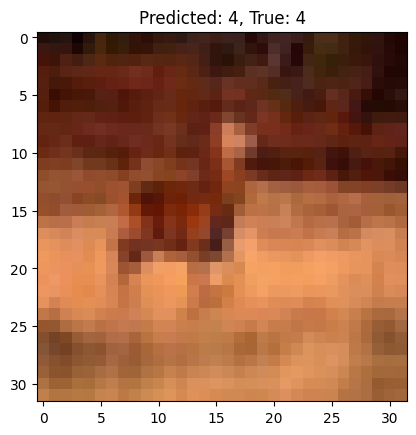

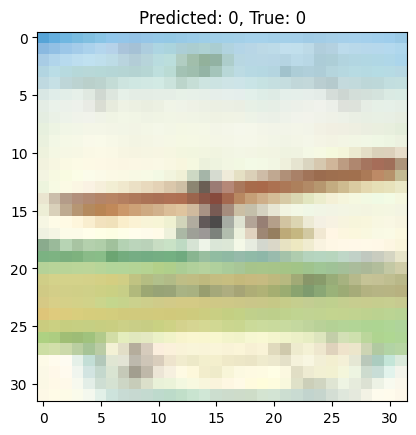

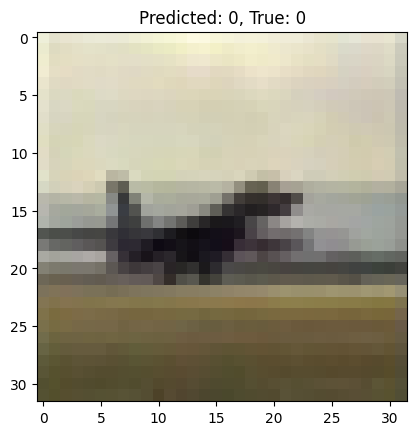

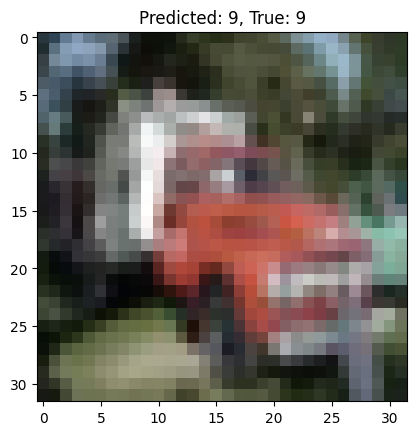

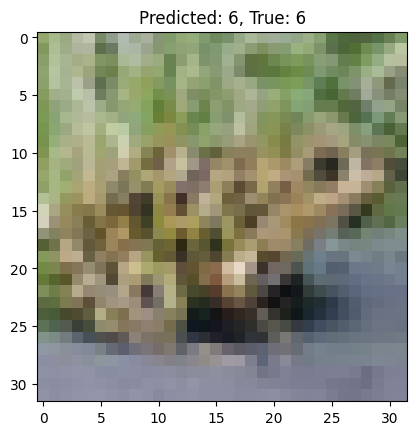

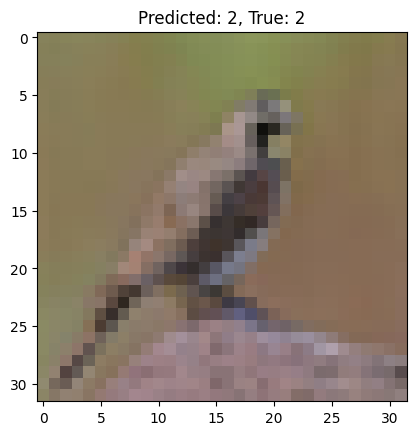

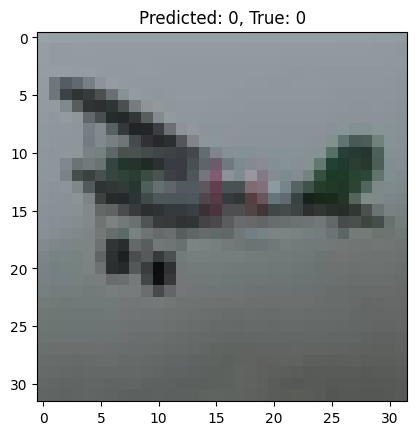

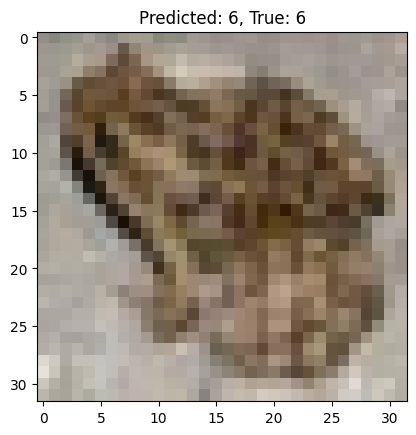

1/1 [==============================] - 0s 25ms/step


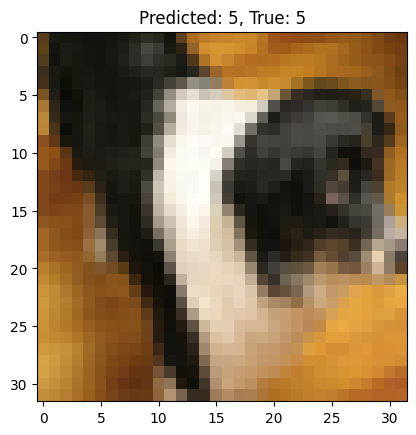

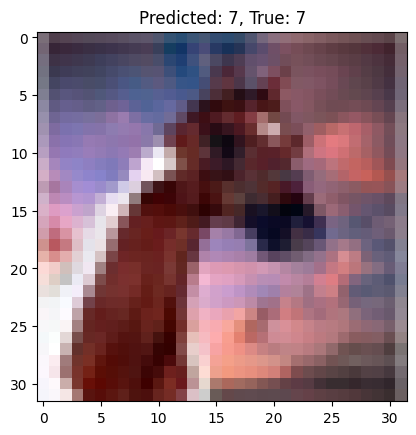

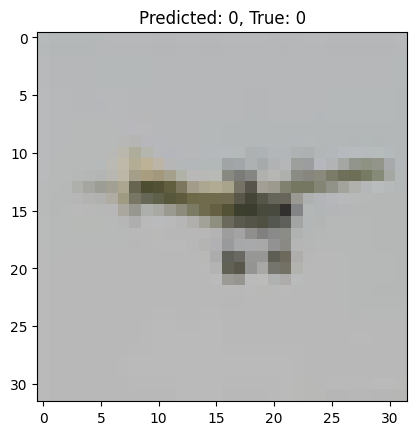

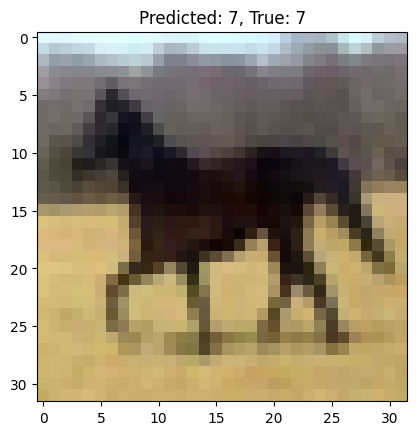

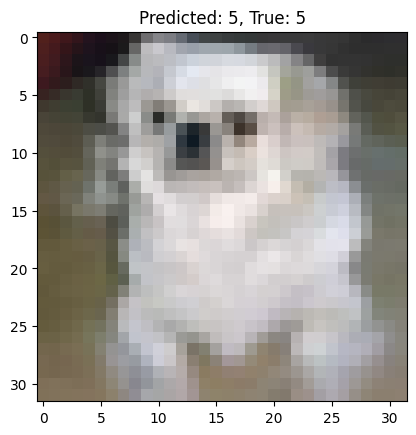

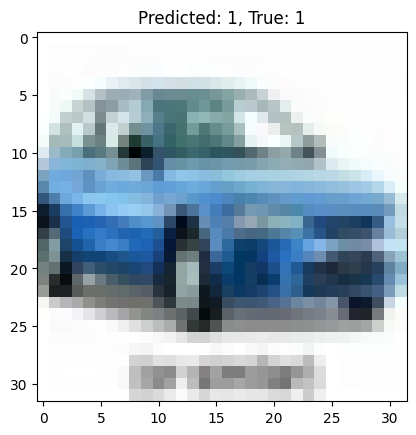

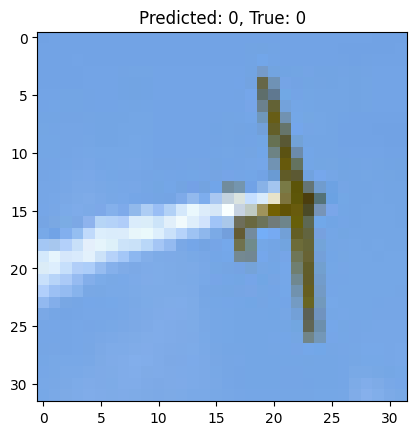

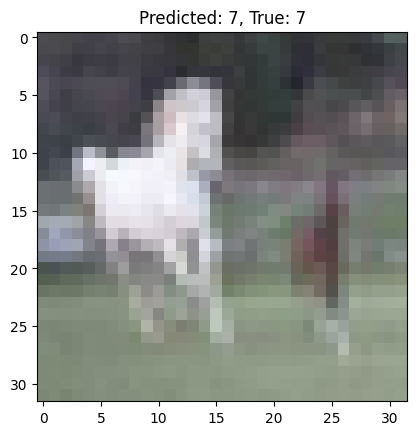

1/1 [==============================] - 0s 27ms/step


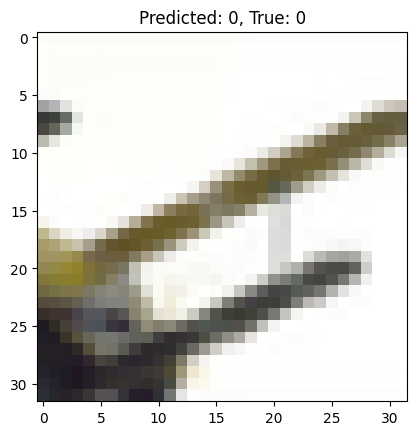

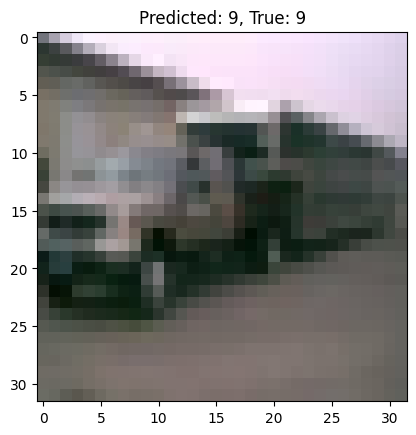

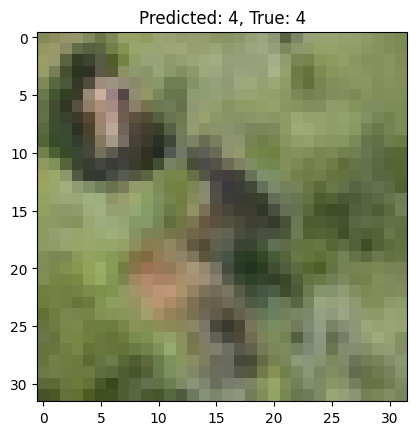

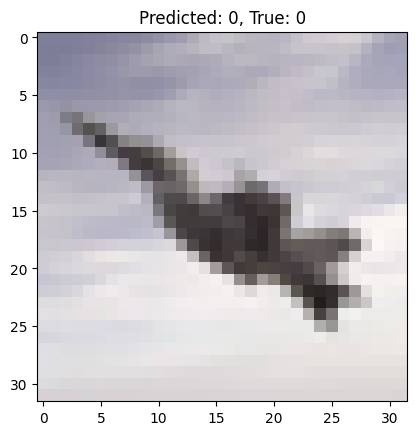

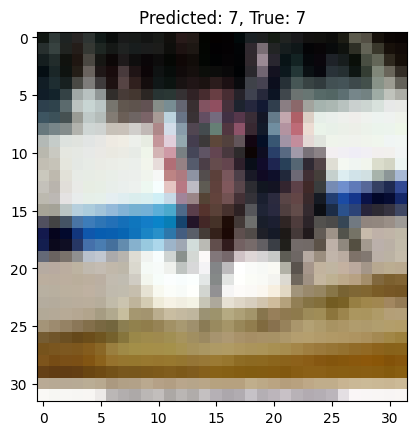

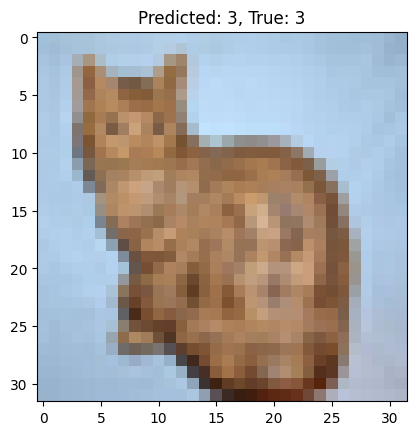

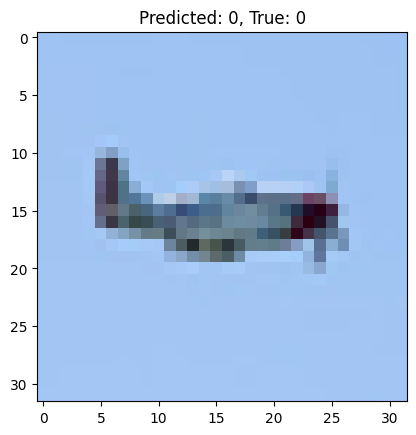

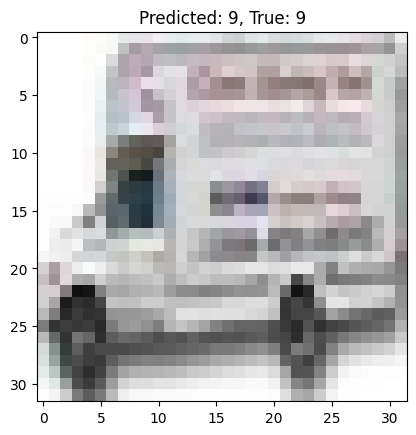

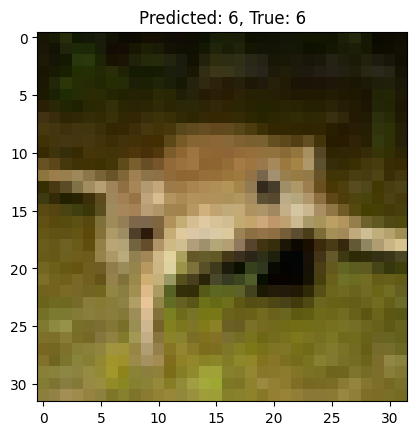

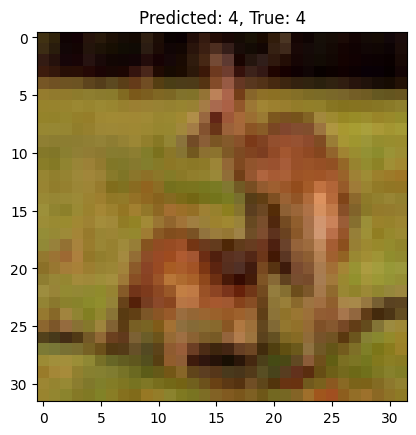

1/1 [==============================] - 0s 40ms/step


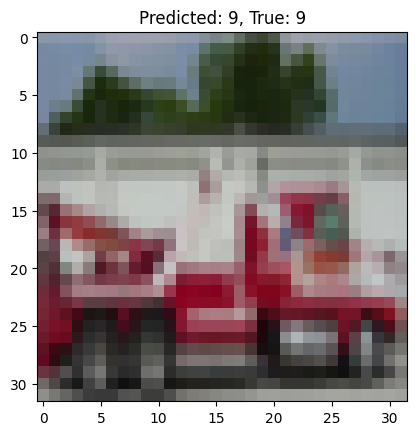

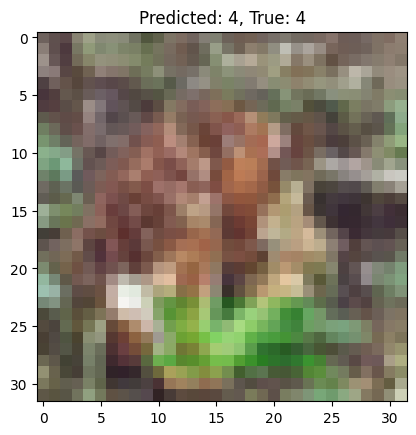

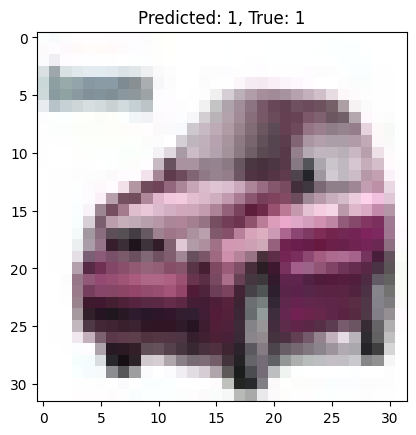

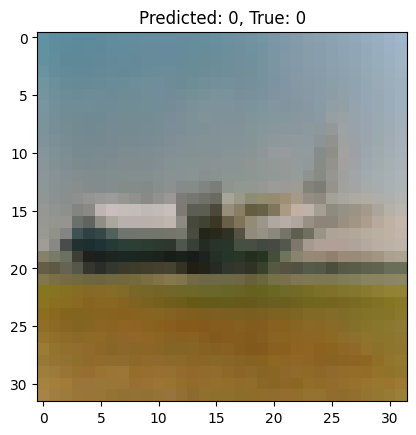

1/1 [==============================] - 0s 30ms/step


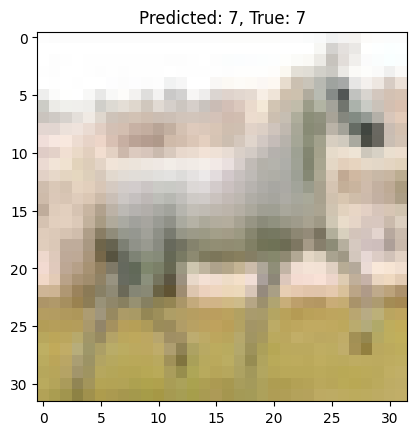

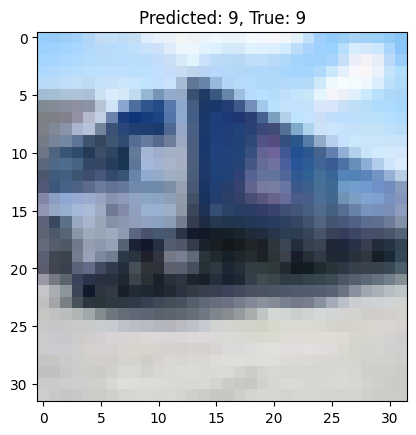

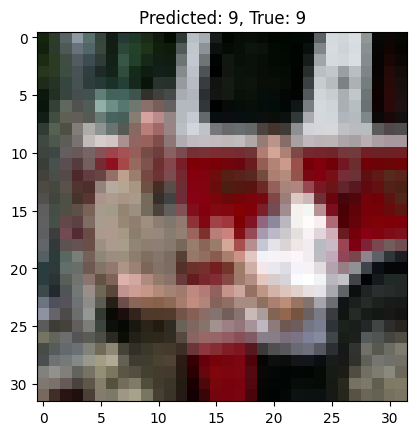

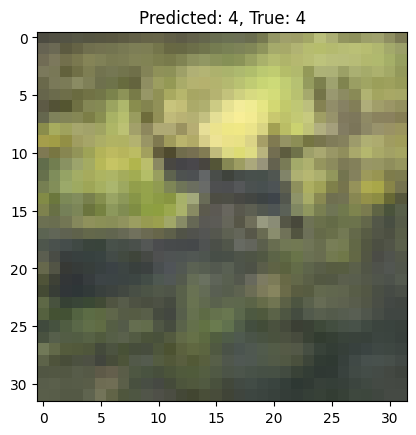

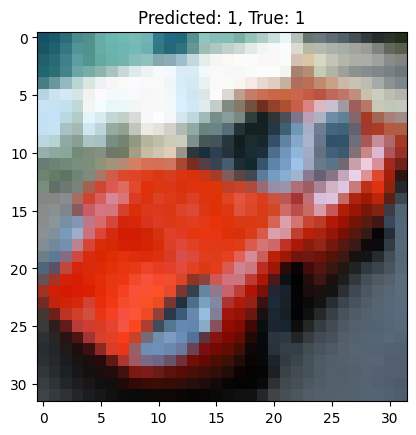

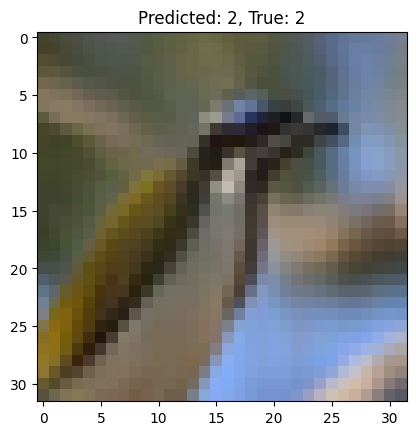

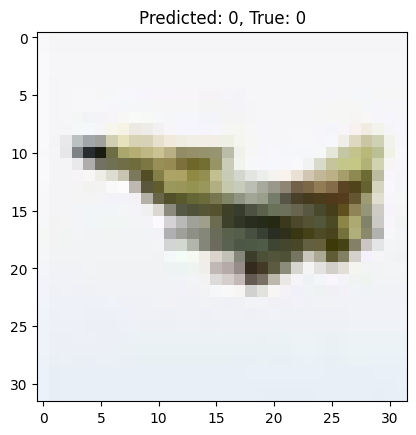

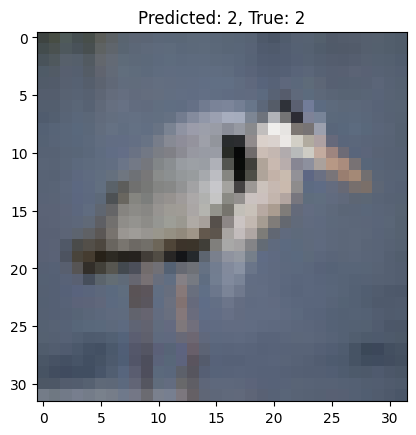

1/1 [==============================] - 0s 27ms/step


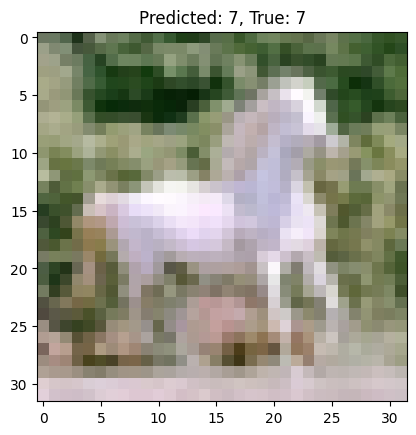

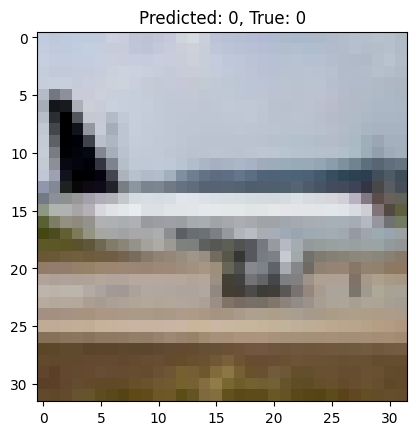

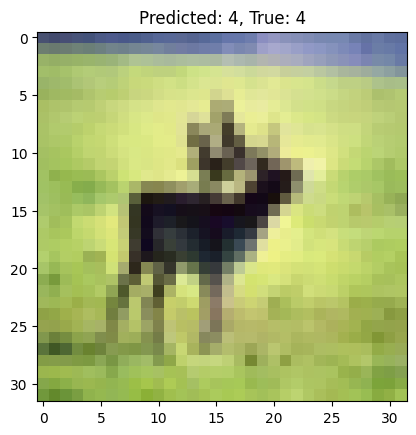

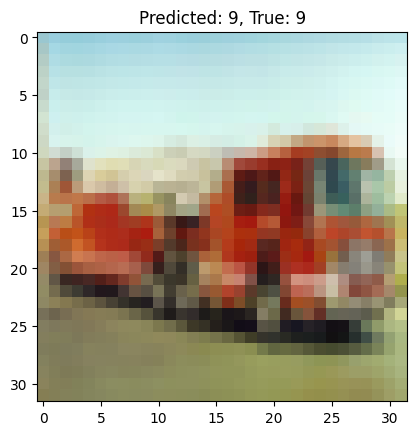

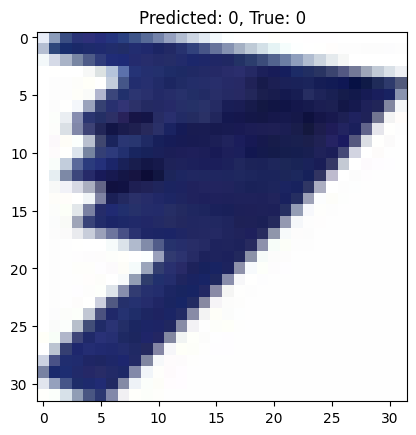

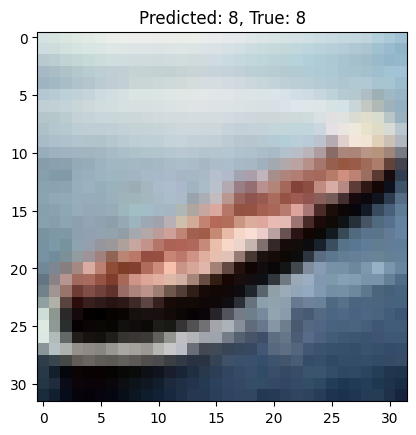

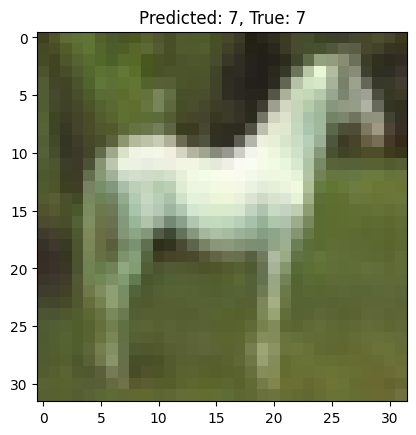

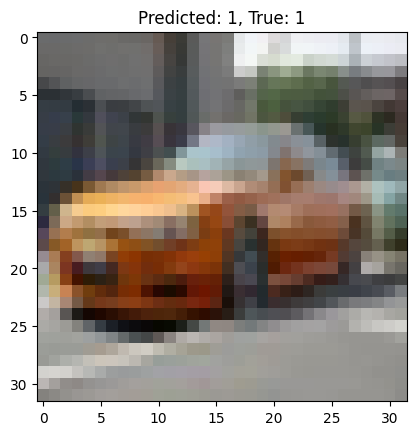

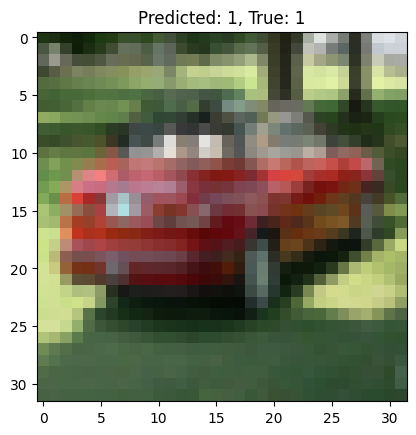

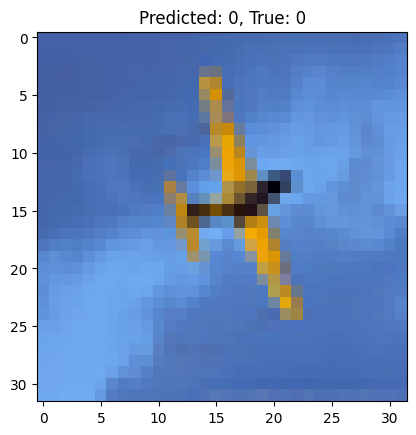

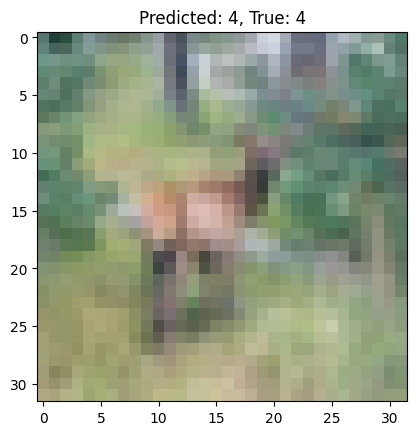

Epoch 4/5
3125/3125 [==============================] - ETA: 0s - loss: 1.4372 - accuracy: 0.5089

KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

formato = "| %-10s | %-5s | %-15s | %-10s |"
formatores = "| %-10s | %-5s | %-15s | %-2.7f |"
cadena = "_" * 53

modo = "categorical"  # o "binary", según sea necesario
dimension = 32  # CIFAR-10 tiene imágenes de 32x32

(x_train, y_train), (x_validation, y_validation) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_validation = x_validation.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_validation = to_categorical(y_validation, 10)

train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=16)

validation_generator = validation_datagen.flow(
    x_validation, y_validation,
    batch_size=16)

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

def show_images_on_decision(generator, num_images=10):
    for _ in range(num_images):
        batch = generator.next()
        predictions = model.predict(batch[0])
        for i in range(len(batch[0])):
            predicted_class = np.argmax(predictions[i])
            true_class = np.argmax(batch[1][i])
            if predicted_class == true_class:
                plt.figure()
                plt.imshow(batch[0][i])
                plt.title(f"Predicted: {predicted_class}, True: {true_class}")
                plt.show()

epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    history = model.fit(
        train_generator,
        steps_per_epoch=len(x_train) // 16,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=len(x_validation) // 16,
        verbose=1)

    # Mostrar imágenes cercanas a la toma de decisiones después de cada época
    show_images_on_decision(validation_generator, num_images=10)

# Mostrar resultados finales
print("\n")
print(cadena)
print(formato % ("Dimension", "Capa", "Filtro", "Precision"))
print(cadena)
print(formatores % (
    dimension, 3, '[64]', history.history['accuracy'][-1] * 100))
print(cadena, "\n")
